In [2376]:
!pip3 install eng-to-ipa
!pip3 install drawsvg

In [2377]:
import eng_to_ipa as ipa
ipa.convert("The quick brown fox jumped over the lazy dog.")

'ðə kwɪk braʊn fɑks ʤəmpt ˈoʊvər ðə ˈleɪzi dɔg.'

In [2378]:
ipa.convert("waiting")

'ˈweɪtɪŋ'

In [2379]:
ipa.convert("studying")

'ˈstədiɪŋ'

In [2380]:
ipa.convert("yield")

'jild'

In [2381]:
ipa.convert("wooed")

'wud'

In [2382]:
ipa.convert("about")

'əˈbaʊt'

In [2383]:
ipa.convert("look")

'lʊk'

In [2384]:
ipa.convert("loon")

'lun'

In [2385]:
def keep_some_y_w(in_string):
    return in_string.replace('wu','uWu').replace('ji','ɪYɪ').replace('iɪŋ','ɪɪYɪŋ').replace('iiŋ','ɪYɪŋ')

In [2386]:
convert_dict = {
    'i': ["uv1","uv1"], # sometimes can be duplicated like "see"
    'ɪ': ["uv1"],
    'ɛ': ["uv2"],
    'e': ["uv2"],
    'æ': ["uv3"],
    'ʊ': ["mv1"],
    'ə': ["mv2"],
    'ɑ': ["mv3"],
    'a': ["mv3"],
    'u': ["lv1"],
    'o': ["lv2"],
    'ɔ': ["lv3"],

    'j': ["uv1"],
    'w': ["lv1"],

    'θ': ["th"],
    'ð': ["dh"],
    'ʃ': ["sh"],
    'ʒ': ["zh"],

    'ʤ': ["d","zh"],
    'ʧ': ["t","sh"],

    'ŋ': ["ng"],

    'ˈ': [],
    'ˌ': [],
    '*': [],
    
    ' ': [" "]
}

In [2387]:
def grafoni_spell(string):
    ipa_string = ipa.convert(string)
    ipa_string = keep_some_y_w(ipa_string)
    out = []
    for letter in ipa_string:
        if letter in convert_dict:
            out += convert_dict[letter]
        else:
            out += [letter]
    return out

In [2388]:
grafoni_spell("I see you studying")

['mv3',
 'uv1',
 ' ',
 's',
 'uv1',
 'uv1',
 ' ',
 'uv1',
 'lv1',
 ' ',
 's',
 't',
 'mv2',
 'd',
 'uv1',
 'uv1',
 'Y',
 'uv1',
 'ng']

In [2389]:
ipa.convert("studying")

'ˈstədiɪŋ'

In [2390]:
grafoni_spell("moths months studying")

['m',
 'lv3',
 'th',
 's',
 ' ',
 'm',
 'mv2',
 'n',
 'th',
 's',
 ' ',
 's',
 't',
 'mv2',
 'd',
 'uv1',
 'uv1',
 'Y',
 'uv1',
 'ng']

In [2391]:
import drawsvg as draw

def bounding_box(strokes):
    min_x = 0
    min_y = 0
    max_x = 0
    max_y = 0
    for stroke in strokes:
        if stroke[0] == 'move':
            min_x = min(min_x,stroke[1])
            min_y = min(min_y,stroke[2])
            max_x = max(max_x,stroke[1])
            max_y = max(max_y,stroke[2])
        if stroke[0] == 'line':
            min_x = min(min_x,stroke[1])
            min_y = min(min_y,stroke[2])
            max_x = max(max_x,stroke[1])
            max_y = max(max_y,stroke[2])
        if stroke[0] == 'quadratic':
            min_x = min(min_x,stroke[1],stroke[3])
            min_y = min(min_y,stroke[2],stroke[4])
            max_x = max(max_x,stroke[1],stroke[3])
            max_y = max(max_y,stroke[2],stroke[4])
        if stroke[0] == 'cubic':
            min_x = min(min_x,stroke[1],stroke[3],stroke[5])
            min_y = min(min_y,stroke[2],stroke[4],stroke[6])
            max_x = max(max_x,stroke[1],stroke[3],stroke[5])
            max_y = max(max_y,stroke[2],stroke[4],stroke[6])
    return min_x, min_y, max_x, max_y

def svgStrokes(strokes, scale = 4,padding = 1, stroke_width = 1.0/3):
    path = draw.Path(stroke='black', fill='none', stroke_width = stroke_width*scale, stroke_linecap='round', stroke_linejoin='round')
    min_x,min_y,max_x,max_y = bounding_box(strokes)
    for stroke in strokes:
        if stroke[0] == 'move':
            path.M(scale*(stroke[1]-min_x)+scale*padding,scale*(stroke[2]-min_y)+scale*padding)
        if stroke[0] == 'line':
            path.L(scale*(stroke[1]-min_x)+scale*padding,scale*(stroke[2]-min_y)+scale*padding)
        if stroke[0] == 'quadratic':
            path.Q(scale*(stroke[1]-min_x)+scale*padding,scale*(stroke[2]-min_y)+scale*padding,scale*(stroke[3]-min_x)+scale*padding,scale*(stroke[4]-min_y)+scale*padding)
        if stroke[0] == 'cubic':
            path.C(scale*(stroke[1]-min_x)+scale*padding,scale*(stroke[2]-min_y)+scale*padding,scale*(stroke[3]-min_x)+scale*padding,scale*(stroke[4]-min_y)+scale*padding,scale*(stroke[5]-min_x)+scale*padding,scale*(stroke[6]-min_y)+scale*padding)
    
    d = draw.Drawing(scale*(max_x-min_x)+2*scale*padding,scale*(max_y-min_y)+2*scale*padding)
    d.append(draw.Use(path,0,0))
    return d

def translate(strokes,dx,dy):
    out = []
    for s in strokes:
        if s[0] == 'move':
            out.append(('move',s[1]+dx,s[2]+dy))
        if s[0] == 'line':
            out.append(('line',s[1]+dx,s[2]+dy))
        if s[0] == 'quadratic':
            out.append(('quadratic',s[1]+dx,s[2]+dy,s[3]+dx,s[4]+dy))
        if s[0] == 'cubic':
            out.append(('cubic',s[1]+dx,s[2]+dy,s[3]+dx,s[4]+dy,s[5]+dx,s[6]+dy))
    return out

def scale(strokes,dx,dy):
    out = []
    for s in strokes:
        if s[0] == 'move':
            out.append(('move',s[1]*dx,s[2]*dy))
        if s[0] == 'line':
            out.append(('line',s[1]*dx,s[2]*dy))
        if s[0] == 'quadratic':
            out.append(('quadratic',s[1]*dx,s[2]*dy,s[3]*dx,s[4]*dy))
        if s[0] == 'cubic':
            out.append(('cubic',s[1]*dx,s[2]*dy,s[3]*dx,s[4]*dy,s[5]*dx,s[6]*dy))
    return out

def concat(strokes, new):
    last_x, last_y = strokes[-1][-2:]
    return strokes + translate(new,last_x,last_y)

In [2392]:
from IPython.display import display

In [2393]:
vowel_scale = 1.5

letter_forms_type = {
    " ": [('move',4,0)],

    "uv1": [('quadratic',1*vowel_scale,-1*vowel_scale,2*vowel_scale,0)],
    "uv2": [('quadratic',2*vowel_scale,-1*vowel_scale,4*vowel_scale,0)],
    "uv3": [('quadratic',4*vowel_scale,-1*vowel_scale,8*vowel_scale,0)],
    "mv1": [('line',2*vowel_scale,0)],
    "mv2": [('line',4*vowel_scale,0)],
    "mv3": [('line',8*vowel_scale,0)],
    "lv1": [('quadratic',1*vowel_scale,1*vowel_scale,2*vowel_scale,0)],
    "lv2": [('quadratic',2*vowel_scale,1*vowel_scale,4*vowel_scale,0)],
    "lv3": [('quadratic',4*vowel_scale,1*vowel_scale,8*vowel_scale,0)],

    "r": [('cubic',2,-2,2,-4,1,-4),('cubic',0,-4,0,-2,2,0)],
    "l": [('cubic',2,-2,2,-8,1,-8),('cubic',0,-8,0,-4,2,0)],
    "m": [('cubic',2,0,2,2,1,2),('cubic',0,2,0,0,2,0)],
    "n": [('cubic',2,2,2,4,1,4),('cubic',0,4,0,2,2,0)],
    "ng":[('cubic',2,2,2,8,1,8),('cubic',0,8,0,4,2,0)],

    "k": [('cubic',2,-2,0,-2,2,-4),('quadratic',0,-2,2,0)],
    "g": [('cubic',2,-2,0,-4,2,-8),('quadratic',0,-4,2,0)],
    "h": [('cubic',2,2,0,2,2,4),('quadratic',0,2,2,0)],
    "x": [('cubic',2,2,0,4,2,8),('quadratic',0,4,2,0)],

    "t": [('quadratic',2,0,2,-2),('move',2,-4),('line',2,0)],
    "d": [('quadratic',2,0,2,-2),('move',2,-8),('line',2,0)],
    "th": [('line',0,4),('move',0,2),('quadratic',0,0,2,0)],
    "dh": [('line',0,8),('move',0,2),('quadratic',0,0,2,0)],

    "p": [('quadratic',2,-2,0,-4),('cubic',2,-2,0,-2,2,0)],
    "b": [('quadratic',2,-4,0,-8),('cubic',2,-4,0,-2,2,0)],
    "f": [('quadratic',2,2,0,4),('cubic',2,2,0,2,2,0)],
    "v": [('quadratic',2,4,0,8),('cubic',2,4,0,2,2,0)],

    "s": [('quadratic',0,-4,1,-4),('quadratic',2,-4,2,0)],
    "z": [('quadratic',0,-8,1,-8),('quadratic',2,-8,2,0)],
    "sh": [('quadratic',0,4,1,4),('quadratic',2,4,2,0)],
    "zh": [('quadratic',0,8,1,8),('quadratic',2,8,2,0)],

    "Y": [('cubic',1,1,-1,1,0,0)],
    "W": [('cubic',1,-1,-1,-1,0,0)],
}

In [2394]:
from math import sqrt

def show_grafoni_type(in_string):
    chars = grafoni_spell(in_string)
    out = [('move',0,0)]
    for l in chars:
        if l in letter_forms_type:
            out = concat(out,letter_forms_type[l])
        else:
            print("error: " + l)
    return display(svgStrokes(out))

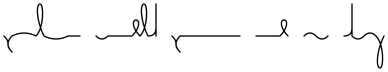

In [2395]:
show_grafoni_type("hello world how are you doing")

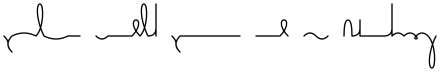

In [2396]:
show_grafoni_type("hello world how are you studying")

In [2397]:
# letter_forms = {
#     " ": [('move',4,0)],

#     "uv1": [('quadratic',1*vowel_scale,-1*vowel_scale,2*vowel_scale,0)],
#     "uv2": [('quadratic',2*vowel_scale,-2*vowel_scale,4*vowel_scale,0)],
#     "uv3": [('quadratic',4*vowel_scale,-4*vowel_scale,8*vowel_scale,0)],
#     "mv1": [('line',2*vowel_scale,0)],
#     "mv2": [('line',4*vowel_scale,0)],
#     "mv3": [('line',8*vowel_scale,0)],
#     "lv1": [('quadratic',1*vowel_scale,1*vowel_scale,2*vowel_scale,0)],
#     "lv2": [('quadratic',2*vowel_scale,2*vowel_scale,4*vowel_scale,0)],
#     "lv3": [('quadratic',4*vowel_scale,4*vowel_scale,8*vowel_scale,0)],

#     "r": [('cubic',1,-2,1,-4,0,-4),('cubic',-1,-4,-1,-2,0,0)],
#     "l": [('cubic',1,-2,1,-8,0,-8),('cubic',-1,-8,-1,-4,0,0)],
#     "m": [('cubic',1,0,1,2,0,2),('cubic',-1,2,-1,0,0,0)],
#     "n": [('cubic',1,2,1,4,0,4),('cubic',-1,4,-1,2,0,0)],
#     "ng":[('cubic',1,2,1,8,0,8),('cubic',-1,8,-1,4,0,0)],

#     "k": [('cubic',2,-2,0,-2,2,-4),('quadratic',0,-2,2,0)],
#     "g": [('cubic',2,-2,0,-4,2,-8),('quadratic',0,-4,2,0)],
#     "h": [('cubic',2,2,0,2,2,4),('quadratic',0,2,2,0)],
#     "x": [('cubic',2,2,0,4,2,8),('quadratic',0,4,2,0)],

#     "t": [('quadratic',2,0,2,-2),('line',2,-4),('line',2,0)],
#     "d": [('quadratic',2,0,2,-2),('line',2,-8),('line',2,0)],
#     "th": [('line',0,4),('line',0,2),('quadratic',0,0,2,0)],
#     "dh": [('line',0,8),('line',0,2),('quadratic',0,0,2,0)],

#     "p": [('quadratic',2,-2,0,-4),('cubic',2,-2,0,-2,2,0)],
#     "b": [('quadratic',2,-4,0,-8),('cubic',2,-4,0,-2,2,0)],
#     "f": [('quadratic',2,2,0,4),('cubic',2,2,0,2,2,0)],
#     "v": [('quadratic',2,4,0,8),('cubic',2,4,0,2,2,0)],

#     "s": [('quadratic',0,-4,1,-4),('quadratic',2,-4,2,0)],
#     "z": [('quadratic',0,-8,1,-8),('quadratic',2,-8,2,0)],
#     "sh": [('quadratic',0,4,1,4),('quadratic',2,4,2,0)],
#     "zh": [('quadratic',0,8,1,8),('quadratic',2,8,2,0)],

#     "Y": [('cubic',1,1,-1,1,0,0)],
#     "W": [('cubic',1,-1,-1,-1,0,0)],

#     "k-beg": [('move',0,-4),('quadratic',-2,-2,0,0)],
#     "g-beg": [('move',0,-8),('quadratic',-2,-4,0,0)],
#     "h-beg": [('move',-1,4),('quadratic',-3,2,0,0)],
#     "x-beg": [('move',-2,8),('quadratic',-4,4,0,0)],

#     "t-beg": [('move',0,-4),('line',0,0)],
#     "d-beg": [('move',0,-8),('line',0,0)],
#     "th-beg": [('move',-1,4),('line',0,0)],
#     "dh-beg": [('move',-2,8),('line',0,0)],

#     "p-beg": [('move',0,-4),('quadratic',2,-2,0,0)],
#     "b-beg": [('move',0,-8),('quadratic',2,-4,0,0)],
#     "f-beg": [('move',-1,4),('quadratic',1,2,0,0)],
#     "v-beg": [('move',-2,8),('quadratic',0,4,0,0)],

#     "k-end": [('quadratic',-1,-2,1,-4),('move',0,0)],
#     "g-end": [('quadratic',0,-4,2,-8),('move',0,0)],
#     "h-end": [('quadratic',-2,2,0,4),('move',0,0)],
#     "x-end": [('quadratic',-2,4,0,8),('move',0,0)],

#     "t-end": [('line',1,-4),('move',0,0)],
#     "d-end": [('line',2,-8),('move',0,0)],
#     "th-end": [('line',0,4),('move',0,0)],
#     "dh-end": [('line',0,8),('move',0,0)],

#     "p-end": [('quadratic',3,-2,1,-4),('move',0,0)],
#     "b-end": [('quadratic',4,-4,2,-8),('move',0,0)],
#     "f-end": [('quadratic',2,2,0,4),('move',0,0)],
#     "v-end": [('quadratic',2,4,0,8),('move',0,0)],
# }

In [2398]:
# don't like the random slopes

letter_forms = {
    " ": [('move',4,0)],

    "uv1": [('quadratic',1*vowel_scale,-1*vowel_scale,2*vowel_scale,0)],
    "uv2": [('quadratic',2*vowel_scale,-2*vowel_scale,4*vowel_scale,0)],
    "uv3": [('quadratic',4*vowel_scale,-4*vowel_scale,8*vowel_scale,0)],
    "mv1": [('line',2*vowel_scale,0)],
    "mv2": [('line',4*vowel_scale,0)],
    "mv3": [('line',8*vowel_scale,0)],
    "lv1": [('quadratic',1*vowel_scale,1*vowel_scale,2*vowel_scale,0)],
    "lv2": [('quadratic',2*vowel_scale,2*vowel_scale,4*vowel_scale,0)],
    "lv3": [('quadratic',4*vowel_scale,4*vowel_scale,8*vowel_scale,0)],

    "r": [('cubic',1,-2,1,-4,0,-4),('cubic',-1,-4,-1,-2,0,0)],
    "l": [('cubic',1,-2,1,-8,0,-8),('cubic',-1,-8,-1,-2,0,0)],
    # "m": [('cubic',1,0,1,2,0,2),('cubic',-1,2,-1,0,0,0)],
    # "m": [('cubic',2,2,-2,2,0,0)],
    # "m": [('cubic',3,0,0,3,0,0)],
    "m": [('cubic',3,3,0,3,0,0)],
    "n": [('cubic',1,2,1,4,0,4),('cubic',-1,4,-1,2,0,0)],
    "ng":[('cubic',1,2,1,8,0,8),('cubic',-1,8,-1,2,0,0)],

    "k": [('cubic',2,-2,0,-2,2,-4),('quadratic',0,-2,2,0)],
    "g": [('cubic',2,-2,0,-4,2,-8),('quadratic',0,-4,2,0)],
    "h": [('cubic',2,2,0,2,2,4),('quadratic',0,2,2,0)],
    "x": [('cubic',2,2,0,4,2,8),('quadratic',0,4,2,0)],

    "t": [('quadratic',2,0,2,-2),('line',2,-4),('line',2,0)],
    "d": [('quadratic',2,0,2,-2),('line',2,-8),('line',2,0)],
    "th": [('line',0,4),('line',0,2),('quadratic',0,0,2,0)],
    "dh": [('line',0,8),('line',0,2),('quadratic',0,0,2,0)],

    "p": [('quadratic',2,-2,0,-4),('cubic',2,-2,0,-2,2,0)],
    "b": [('quadratic',2,-4,0,-8),('cubic',2,-4,0,-2,2,0)],
    "f": [('quadratic',2,2,0,4),('cubic',2,2,0,2,2,0)],
    "v": [('quadratic',2,4,0,8),('cubic',2,4,0,2,2,0)],

    "s": [('quadratic',0,-4,1,-4),('quadratic',2,-4,2,0)],
    "z": [('quadratic',0,-8,1,-8),('quadratic',2,-8,2,0)],
    "sh": [('quadratic',0,4,1,4),('quadratic',2,4,2,0)],
    "zh": [('quadratic',0,8,1,8),('quadratic',2,8,2,0)],

    "Y": [('cubic',1,1,-1,1,0,0)],
    "W": [('cubic',1,-1,-1,-1,0,0)],

    "k-beg": [('move',0,-4),('quadratic',-2,-2,0,0)],
    "g-beg": [('move',0,-8),('quadratic',-2,-4,0,0)],
    "h-beg": [('move',0,4),('quadratic',-2,2,0,0)],
    "x-beg": [('move',0,8),('quadratic',-2,4,0,0)],

    "t-beg": [('move',0,-4),('line',0,0)],
    "d-beg": [('move',0,-8),('line',0,0)],
    "th-beg": [('move',0,4),('line',0,0)],
    "dh-beg": [('move',0,8),('line',0,0)],

    "p-beg": [('move',0,-4),('quadratic',2,-2,0,0)],
    "b-beg": [('move',0,-8),('quadratic',2,-4,0,0)],
    "f-beg": [('move',0,4),('quadratic',2,2,0,0)],
    "v-beg": [('move',0,8),('quadratic',2,4,0,0)],

    "k-end": [('quadratic',-2,-2,0,-4),('move',0,0)],
    "g-end": [('quadratic',-2,-4,0,-8),('move',0,0)],
    "h-end": [('quadratic',-2,2,0,4),('move',0,0)],
    "x-end": [('quadratic',-2,4,0,8),('move',0,0)],

    "t-end": [('line',0,-4),('move',0,0)],
    "d-end": [('line',0,-8),('move',0,0)],
    "th-end": [('line',0,4),('move',0,0)],
    "dh-end": [('line',0,8),('move',0,0)],

    "p-end": [('quadratic',2,-2,0,-4),('move',0,0)],
    "b-end": [('quadratic',2,-4,0,-8),('move',0,0)],
    "f-end": [('quadratic',2,2,0,4),('move',0,0)],
    "v-end": [('quadratic',2,4,0,8),('move',0,0)],

    ".": [('move',2,0),('quadratic',2,0.25,2.125,0.25),('quadratic',2.25,0.25,2.25,0),('quadratic',2.25,-0.25,2.125,-0.25),('quadratic',2,-0.25,2,0),('move',4,0)],
    ",": [('move',2,0),('quadratic',3,1,2,2),('move',4,0)],
    ":": [('move',2,2),('quadratic',2,2.25,2.125,2.25),('quadratic',2.25,2.25,2.25,2),('quadratic',2.25,1.75,2.125,1.75),('quadratic',2,1.75,2,2),('move',2,-2),('quadratic',2,-2.25,2.125,-2.25),('quadratic',2.25,-2.25,2.25,-2),('quadratic',2.25,-1.75,2.125,-1.75),('quadratic',2,-1.75,2,-2),('move',4,0)], 
    ";": [('move',2,2),('quadratic',3,3,2,4),('move',2,-2),('quadratic',2,-2.25,2.125,-2.25),('quadratic',2.25,-2.25,2.25,-2),('quadratic',2.25,-1.75,2.125,-1.75),('quadratic',2,-1.75,2,-2),('move',4,0)],   
    #"-": [('move',2,-1),('line',3,1),('move',5,0)], #from the 1910 edition
    "-": [('move',2,-1),('line',4,-1),('move',2,1),('line',4,1),('move',6,0)], #from the 1913 edition
    "(": [('move',3,6),('quadratic',0,0,3,-6),('move',5,0)],
    ")": [('move',2,6),('quadratic',5,0,2,-6),('move',5,0)],

    #from the 1917 book on just the numerals, not from the 1913 text
    "1": [('move',0,-8),('line',0,0),('move',3,0)],
    "2": [('move',0,-8),('quadratic',2,-8,0,-4),('quadratic',-1,-2,0,0),('move',3,0)],
    "3": [('move',0,-8),('quadratic',2,-6,0,-4),('quadratic',2,-2,0,0),('move',3,0)],
    "4": [('move',0,-8),('quadratic',2,-4,0,0),('line',2,-2),('move',3,0)],
    "5": [('move',0,-8),('quadratic',-2,-6,0,-4),('quadratic',2,-2,0,0),('move',3,0)],
    "6": [('move',1,-8),('quadratic',-1,0,1,0),('quadratic',2,0,3,-1),('move',4,0)],
    "7": [('move',-1,-6),('quadratic',0,-7,0,-8),('line',0,0),('move',3,0)],
    "8": [('move',0,-8),('line',0,-4),('quadratic',0,0,-1,0),('quadratic',-2,0,0,-4),('move',3,0)],
    "9": [('move',0,-8),('quadratic',2,-4,0,0),('move',3,0)],
    "0": [('move',0,-4),('quadratic',1,-5,2,-4),('move',3,0)],
}

In [2399]:
def process_ends(in_grafoni):
    in_grafoni = [" "] + in_grafoni + [" "]
    out_grafoni = []
    for i in range(len(in_grafoni)-2):
        # beginning
        l, m, r = in_grafoni[i:i+3]
        if l in [" ",",",".","-"] and (m in ["k","g","t","d","p","b","h","x"]):
            m += "-beg"
        if l in [" ",",",".","-"] and m in ["th","dh"] and not r in ["uv1","uv2","uv3","mv1","mv2","mv3"]:
            m += "-beg"
        if l in [" ",",",".","-"] and m in ["f","v"] and not r in ["uv1","uv2","uv3"]:
            m += "-beg"
        # ending
        if r in [" ",",",".","-"] and m in ["p","b","h","x","th","dh","f","v"]:
            m += "-end"
        if r in [" ",",",".","-"] and m in ["t","d"] and not l in ["lv1","lv2","lv3","mv1","mv2","mv3"]:
            m += "-end"
        if r in [" ",",",".","-"] and m in ["k","g"] and not l in ["lv1","lv2","lv3"]:
            m += "-end"
        out_grafoni.append(m)
    return out_grafoni

In [2400]:
def shear(strokes,by=-1):
    out = []
    for s in strokes:
        if s[0] == 'move':
            out.append(('move',s[1]+by*s[2],s[2]))
        if s[0] == 'line':
            out.append(('line',s[1]+by*s[2],s[2]))
        if s[0] == 'quadratic':
            out.append(('quadratic',s[1]+by*s[2],s[2],s[3]+by*s[4],s[4]))
        if s[0] == 'cubic':
            out.append(('cubic',s[1]+by*s[2],s[2],s[3]+by*s[4],s[4],s[5]+by*s[6],s[6]))
    return out

In [2401]:
from math import sqrt

def show_grafoni(in_string,bend = True):
    chars = in_string
    if isinstance(chars, str):
        chars = process_ends(grafoni_spell(in_string))
    print(" ".join(chars))
    out = [('move',0,0)]
    for l in chars:
        if l in letter_forms:
            out = concat(out,letter_forms[l])
        else:
            print("error: " + l)
    if bend:
        #return display(svgStrokes(shear(scale(out,1,0.5),by=-1/sqrt(3))))
        return display(svgStrokes(shear(scale(out,1,0.5),by=-1)))
    else:
        return display(svgStrokes(out))

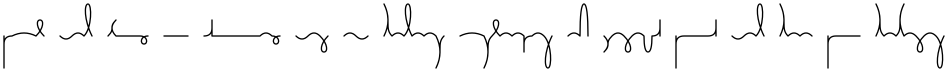

In [2402]:
show_grafoni_type("there will come a time when you believe everything is finished that will be the beginning")

dh uv2 r   lv1 uv1 l   k-beg mv2 m   mv2   t-beg mv3 uv1 m   lv1 uv1 n   uv1 lv1   b-beg uv1 l uv1 uv1 v-end   uv2 v r uv1 uv1 th uv1 ng   uv1 z   f uv1 n uv1 sh t-end   dh mv2 t   lv1 uv1 l   b-beg uv1 uv1   dh mv2   b-beg uv1 g uv1 n uv1 ng


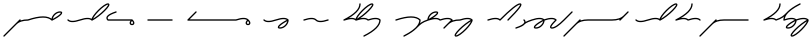

In [2403]:
show_grafoni("there will come a time when you believe everything is finished that will be the beginning",bend=True)

mv2   g-beg r uv2 uv1 t-end   d-beg uv1 uv1 l   mv2 v-end   t-beg mv3 uv1 m   uv1 z   l lv3 s t-end   b-beg mv3 uv1   dh mv2   p-beg r uv2 z mv2 n t-end   uv1 n d mv2 r uv2 k t-end   m uv2 th mv2 d   mv2 v-end   r uv1 k lv3 r d uv1 ng   b-beg uv1 z n uv1 s   k-beg lv3 r mv2 s p mv3 n d mv2 n s


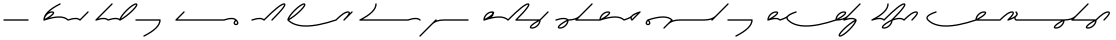

In [2404]:
show_grafoni("a great deal of time is lost by the present indirect method of recording business correspondence")

In [2405]:
show_grafoni("world")

lv1 mv2 r l d-end


In [2406]:
show_grafoni(["k", "s"])

k s


In [2407]:
# change last curve to be a little longer, and flat.  do nothing with negatives, but do something with non-negatives, including zero
def r_extend(strokes,length=1):
    strokes = strokes.copy()
    if length < 0:
        return strokes
    s = strokes[-1]
    if s[0] == 'move':
        strokes[-1] = ('move',s[1]+length,s[2])
    if s[0] == 'line':
        strokes[-1] = ('quadratic',s[1],s[2],s[1]+length,s[2])
    if s[0] == 'quadratic':
        strokes[-1] = ('cubic',s[1],s[2],s[3],s[4],s[3]+length,s[4])
    if s[0] == 'cubic':
        strokes[-1] = ('cubic',s[1],s[2],s[3],s[6],s[5]+length,s[6]) #note I kinda just flatten the end
    return strokes

# change first curve to be a little longer and flat, translate the rest
# assumes you start at 0,0 (as all should)
def l_extend(strokes,length = 1):
    strokes = strokes.copy()
    if length < 0:
        return strokes
    s = strokes[0]
    if s[0] == 'move':
        strokes[0] = ('move',s[1]+length,s[2])
    if s[0] == 'line':
        strokes[0] = ('quadratic',length,0,s[1]+length,s[2])
    if s[0] == 'quadratic':
        strokes[0] = ('cubic',length,0,s[1]+length,s[2],s[3]+length,s[4])
    if s[0] == 'cubic':
        strokes[0] = ('cubic',s[1]+length,0,s[3]+length,s[4],s[5]+length,s[6]) #note I kinda just flatten the end
    return [strokes[0]] + translate(strokes[1:],length,0)
    

In [2408]:
def show_extended(letter,l_length,r_length):
    out = [('move',0,0)]
    out += r_extend(l_extend(letter_forms[letter],l_length),r_length)
    print(out)
    display(svgStrokes(out))

In [2409]:
show_extended("t",-1,1)

[('move', 0, 0), ('quadratic', 2, 0, 2, -2), ('line', 2, -4), ('quadratic', 2, 0, 3, 0)]


In [2410]:
def show_kern(l_letter,r_letter,l_length,r_length):
    out = [('move',0,0)]
    out += r_extend(letter_forms[l_letter],l_length)
    out = concat(out,l_extend(letter_forms[r_letter],r_length))
    display(svgStrokes(out))

In [2411]:
show_kern("n","v",1,1)

#potential ligatures
* k lv1
* th r
* f r
* f l
* s m
* s n
* s f
* k sh
* sh r
* m p
* m p
* n t
* n d

In [2412]:
from collections import defaultdict

# this dictionary will hold kerning instructions for pairs of letters, it says how much to kern the left letter on the right and the right letter on the left
kerning = defaultdict(lambda: (-1,-1))
kerning[("t-beg","r")] = (-1,2)
kerning[("t-beg","l")] = (-1,2)
kerning[("d-beg","r")] = (-1,2)
kerning[("d-beg","l")] = (-1,2)
kerning[("t","r")] = (-1,2)
kerning[("t","l")] = (-1,2)
kerning[("d","r")] = (-1,2)
kerning[("d","l")] = (-1,2)
kerning[("t","s")] = (-1,2)
kerning[("t","z")] = (-1,2)
kerning[("d","s")] = (-1,2)
kerning[("d","z")] = (-1,2)
kerning[("g-beg","r")] = (1,1)
kerning[("g-beg","l")] = (1,1)
kerning[("k-beg","r")] = (1,1)
kerning[("k-beg","l")] = (1,1)
kerning[("g","r")] = (1,1)
kerning[("g","l")] = (1,1)
kerning[("k","r")] = (1,1)
kerning[("k","l")] = (1,1)
kerning[("r","p")] = (1,0.5)
kerning[("r","b")] = (1,0.5)
kerning[("l","p")] = (1,0.5)
kerning[("l","b")] = (1,0.5)
kerning[("p-beg","r")] = (-1,2.5)
kerning[("p-beg","l")] = (-1,2.5)
kerning[("b-beg","r")] = (-1,2.5)
kerning[("b-beg","l")] = (-1,2.5)
kerning[("p","r")] = (0.5,1)
kerning[("p","l")] = (0.5,1)
kerning[("b","r")] = (0.5,0.5)
kerning[("b","l")] = (0.5,0.5)
kerning[("r","l")] = (1,1)
kerning[("r","k")] = (0.5,0.5)
kerning[("r","g")] = (0.5,0.5)
kerning[("r","s")] = (1.5,0.5)
kerning[("r","z")] = (1.5,0.5)
kerning[("l","r")] = (1,1)
kerning[("l","k")] = (0.5,0.5)
kerning[("l","g")] = (0.5,0.5)
kerning[("l","s")] = (1.5,0.5)
kerning[("l","z")] = (1.5,0.5)
kerning[("s","t-end")] = (-1,1)
kerning[("s","d-end")] = (-1,1)
kerning[("z","t-end")] = (-1,1)
kerning[("z","d-end")] = (-1,1)
kerning[("r","t-end")] = (2,-1)
kerning[("r","d-end")] = (2,-1)
kerning[("l","t-end")] = (2,-1)
kerning[("l","d-end")] = (2,-1)
kerning[("k","t-end")] = (2,-1)
kerning[("k","d-end")] = (2,-1)
kerning[("g","t-end")] = (2,-1)
kerning[("g","d-end")] = (2,-1)
kerning[("s","p")] = (-1,1)
kerning[("s","b")] = (-1,1)
kerning[("z","p")] = (-1,1)
kerning[("z","b")] = (-1,1)
kerning[("s","k")] = (-1,0.5)
kerning[("s","g")] = (-1,0.5)
kerning[("z","k")] = (-1,0.5)
kerning[("z","g")] = (-1,0.5)
kerning[("s","r")] = (-1,2)
kerning[("s","l")] = (-1,2)
kerning[("z","r")] = (-1,2)
kerning[("z","l")] = (-1,2)
kerning[("k","s")] = (1,-1)
kerning[("k","z")] = (1,-1)
kerning[("g","s")] = (1,-1)
kerning[("g","z")] = (1,-1)
kerning[("k-beg","s")] = (1,-1)
kerning[("k-beg","z")] = (1,-1)
kerning[("g-beg","s")] = (1,-1)
kerning[("g-beg","z")] = (1,-1)
kerning[("t","r")] = (-1,2)
kerning[("t","l")] = (-1,2)
kerning[("d","r")] = (-1,2)
kerning[("d","l")] = (-1,2)
kerning[("r","mv1")] = (1,-1)
kerning[("r","mv2")] = (1,-1)
kerning[("r","mv3")] = (1,-1)
kerning[("l","mv1")] = (1,-1)
kerning[("l","mv2")] = (1,-1)
kerning[("l","mv3")] = (1,-1)
kerning[("mv1","r")] = (-1,1)
kerning[("mv2","r")] = (-1,1)
kerning[("mv3","r")] = (-1,1)
kerning[("mv1","l")] = (-1,1)
kerning[("mv2","l")] = (-1,1)
kerning[("mv3","l")] = (-1,1)
kerning[("n","mv1")] = (1,-1)
kerning[("n","mv2")] = (1,-1)
kerning[("n","mv3")] = (1,-1)
kerning[("ng","mv1")] = (1,-1)
kerning[("ng","mv2")] = (1,-1)
kerning[("ng","mv3")] = (1,-1)
kerning[("mv1","n")] = (-1,1)
kerning[("mv2","n")] = (-1,1)
kerning[("mv3","n")] = (-1,1)
kerning[("mv1","ng")] = (-1,1)
kerning[("mv2","ng")] = (-1,1)
kerning[("mv3","ng")] = (-1,1)
kerning[("n","sh")] = (2,-1)
kerning[("n","zh")] = (2,-1)
kerning[("ng","sh")] = (2,-1)
kerning[("ng","zh")] = (2,-1)
kerning[("m","r")] = (-1,1)
kerning[("m","l")] = (-1,1)
kerning[("n","r")] = (0.5,0.5)
kerning[("n","l")] = (0.5,0.5)
kerning[("ng","r")] = (0.5,0.5)
kerning[("ng","l")] = (0.5,0.5)
kerning[("r","m")] = (1,-1)
kerning[("r","n")] = (0.5,0.5)
kerning[("r","ng")] = (0.5,0.5)
kerning[("l","m")] = (1,-1)
kerning[("l","n")] = (0.5,0.5)
kerning[("l","ng")] = (0.5,0.5)
kerning[("n","h")] = (0.5,0.5)
kerning[("n","x")] = (0.5,0.5)
kerning[("ng","h")] = (0.5,0.5)
kerning[("ng","x")] = (0.5,0.5)
kerning[("r","k")] = (0.5,0.5)
kerning[("l","k")] = (0.5,0.5)
kerning[("r","g")] = (0.5,0.5)
kerning[("l","g")] = (0.5,0.5)
kerning[("r","k-end")] = (2.5,-1)
kerning[("l","k-end")] = (2.5,-1)
kerning[("r","g-end")] = (2.5,-1)
kerning[("l","g-end")] = (2.5,-1)
kerning[("p","t-end")] = (1,-1)
kerning[("p","d-end")] = (1,-1)
kerning[("b","t-end")] = (1,-1)
kerning[("b","d-end")] = (1,-1)
kerning[("n","f")] = (1,1)
kerning[("n","v")] = (1,1)
kerning[("m","n")] = (-1,1.5)
kerning[("m","ng")] = (-1,1.5)
kerning[("n","m")] = (1.5,-1)
kerning[("ng","m")] = (1.5,-1)

In [2413]:
def show_grafoni_kerned(in_string,bend = True):
    chars = in_string
    if isinstance(chars, str):
        chars = process_ends(grafoni_spell(in_string))
    print(" ".join(chars))
    out = [('move',0,0)]
    last_char = " "
    for l in chars:
        if l in letter_forms:
            l_kern,r_kern = kerning[(last_char,l)]
            last_char = l
            out = concat(r_extend(out,l_kern),l_extend(letter_forms[l],r_kern))
        else:
            print("error: " + l)
    if bend:
        #return display(svgStrokes(shear(scale(out,1,0.5),by=-1/sqrt(3))))
        return display(svgStrokes(shear(scale(out,1,0.5),by=-1)))
    else:
        return display(svgStrokes(out))

s p l uv3 sh   lv1 mv2 r l d-end


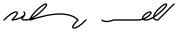

In [2414]:
show_grafoni_kerned("splash world")

mv2   g-beg r uv2 uv1 t-end   d-beg uv1 uv1 l   mv2 v-end   t-beg mv3 uv1 m   uv1 z   l lv3 s t-end   b-beg mv3 uv1   dh mv2   p-beg r uv2 z mv2 n t-end   uv1 n d mv2 r uv2 k t-end   m uv2 th mv2 d   mv2 v-end   r uv1 k lv3 r d uv1 ng   b-beg uv1 z n uv1 s   k-beg lv3 r mv2 s p mv3 n d mv2 n s


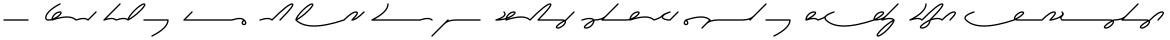

In [2415]:
show_grafoni_kerned("a great deal of time is lost by the present indirect method of recording business correspondence")

s p uv2 uv1 s   dh mv2   f-beg mv3 uv1 n mv2 l   f-beg r mv2 n t uv1 r   dh uv1 uv1 z   mv2 r   dh mv2   v-beg lv3 uv1 uv1 d zh uv1 z   mv2 v-end   dh mv2   s t mv3 r sh uv1 p-end   uv2 n mv2 r p r mv3 uv1 z


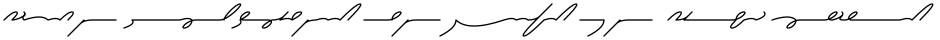

In [2416]:
show_grafoni_kerned("space the final frontier these are the voyages of the starship enterprise")

h-beg uv2 l lv2 mv1   h-beg mv3 mv1   mv2 r   uv1 lv1   f uv1 uv1 l uv1 ng   t-beg mv2 d uv2 uv1


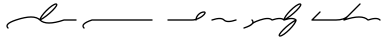

In [2417]:
show_grafoni_kerned("hello how are you feeling today")

mv3 uv1   n lv1   dh mv2   m lv2 mv1 m mv2 n t-end   dh mv2 t   mv3 uv1   f uv2 l   uv1 n t lv1   dh mv2   f uv1 sh mv2 r   dh mv2 t   m mv3 uv1   b-beg mv1 k-end   lv1 mv1 d   n mv3 t   b-beg uv1 uv1   d-beg uv1 s t r lv3 uv1 d-end   uv2 z   mv3 uv1   h-beg uv3 d-end   p-beg l uv3 n d-end


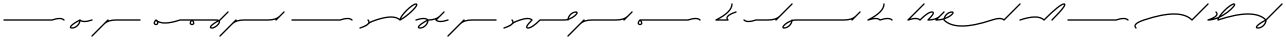

In [2418]:
show_grafoni_kerned("I knew the moment that I fell into the fissure that my book would not be destroyed as I had planned")

In [2419]:
def show_grafoni_kerned_wrapped(in_string,wrap = 100,shear_val=-1,line_space=20,v_scale=0.5):
    chars = in_string
    if isinstance(chars, str):
        chars = process_ends(grafoni_spell(in_string))
    print(" ".join(chars))
    out = [('move',0,0)]
    last_char = " "
    for l in chars:
        if l in letter_forms:
            l_kern,r_kern = kerning[(last_char,l)]
            last_char = l
            out = concat(r_extend(out,l_kern),l_extend(letter_forms[l],r_kern))
        else:
            print("error: " + l)
        if last_char == " "  and out[-1][-2] + shear_val*v_scale*out[-1][-1] > wrap:
            out.append(('move',-shear_val*v_scale*(out[-1][-1]+line_space),out[-1][-1]+line_space))
    return display(svgStrokes(shear(scale(out,1,v_scale),by=shear_val)))

mv3 uv1   n lv1   dh mv2   m lv2 mv1 m mv2 n t-end   dh mv2 t   mv3 uv1   f uv2 l   uv1 n t lv1   dh mv2   f uv1 sh mv2 r   dh mv2 t   m mv3 uv1   b-beg mv1 k-end   lv1 mv1 d   n mv3 t   b-beg uv1 uv1   d-beg uv1 s t r lv3 uv1 d-end   uv2 z   mv3 uv1   h-beg uv3 d-end   p-beg l uv3 n d-end .   uv2 z   mv3 uv1   f uv2 l   uv1 n t lv1   dh mv2 t   s t mv3 r uv1 uv1   uv1 k s p uv3 n s


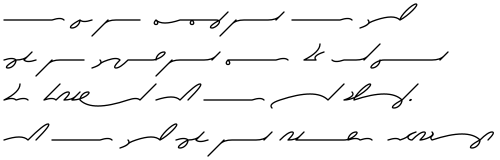

In [2420]:
show_grafoni_kerned_wrapped("I knew the moment that I fell into the fissure that my book would not be destroyed as I had planned. as I fell into that starry expanse")

dh uv2 r   lv1 uv1 l   k-beg mv2 m   mv2   t-beg mv3 uv1 m   lv1 uv1 n   uv1 lv1   b-beg uv1 l uv1 uv1 v-end   uv2 v r uv1 uv1 th uv1 ng   uv1 z   f uv1 n uv1 sh t-end   dh mv2 t   lv1 uv1 l   b-beg uv1 uv1   dh mv2   b-beg uv1 g uv1 n uv1 ng


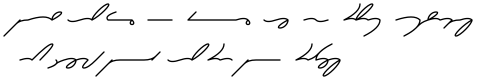

In [2421]:
show_grafoni_kerned_wrapped("there will come a time when you believe everything is finished that will be the beginning")

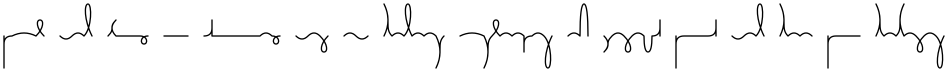

In [2422]:
show_grafoni_type("there will come a time when you believe everything is finished that will be the beginning")

mv3 uv1   r uv1 uv1 mv2 l mv3 uv1 z d-end ,   dh mv2   m lv2 mv1 m mv2 n t-end   mv3 uv1   f uv2 l   uv1 n t lv1   dh mv2   f uv1 sh mv2 r ,   dh mv2 t   dh mv2   b-beg mv1 k-end   lv1 mv1 d   n mv3 t   b-beg uv1 uv1   d-beg uv1 s t r lv3 uv1 d-end   uv2 z   mv3 uv1   h-beg uv3 d-end   p-beg l uv3 n d-end .   uv1 t-end   k-beg mv2 n t uv1 n uv1 lv1 d   f-beg mv3 l uv1 ng   uv1 n t lv1   dh mv2 t   s t mv3 r uv1 uv1   uv1 k s p uv3 n s   mv2 v-end   lv1 uv1 t sh   mv3 uv1   h-beg uv3 d-end   lv2 mv1 n l uv1 uv1   mv2   f-beg l uv1 uv1 t uv1 ng   g-beg l uv1 m p s .   mv3 uv1   h-beg uv3 v-end   t-beg r mv3 uv1 d-end   t-beg uv1   s p uv2 k uv1 mv2 l uv2 uv1 t-end   lv1 uv2 r   uv1 t-end   m mv3 uv1 t-end   h-beg uv3 v-end   l uv3 n d uv1 d-end ,   b-beg mv2 t   mv3 uv1   m mv2 s t-end   mv2 d m uv1 t-end ,   h-beg lv2 lv1 uv2 v uv2 r - s lv1 c h-end   k-beg mv2 n d zh uv2 k t sh mv2 r   uv1 z   f uv1 lv1 t mv2 l .   s t uv1 l ,   dh mv2   k-beg lv1 uv2 sh mv2 n   mv2 v-end   h-beg lv1 z

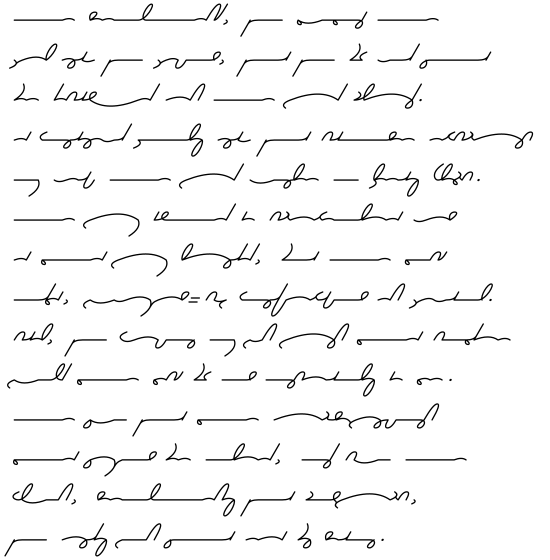

In [2423]:
show_grafoni_kerned_wrapped("I realized, the moment I fell into the fissure, that the book would not be destroyed as I had planned. It continued falling into that starry expanse of which I had only a fleeting glimpse. I have tried to speculate where it might have landed, but I must admit, however-such conjecture is futile. Still, the question of whose hands might someday hold my mist book are unsettling to me. I know that my apprehensions might never be allayed, and so I close, realizing that perhaps, the ending has not yet been written.",shear_val=-1/sqrt(3),wrap=105)

dh uv2 r   lv1 uv1 l   k-beg mv2 m   mv2   t-beg mv3 uv1 m   lv1 uv1 n   uv1 lv1   b-beg uv1 l uv1 uv1 v-end   uv2 v r uv1 uv1 th uv1 ng   uv1 z   f uv1 n uv1 sh t-end   dh mv2 t   lv1 uv1 l   b-beg uv1 uv1   dh mv2   b-beg uv1 g uv1 n uv1 ng


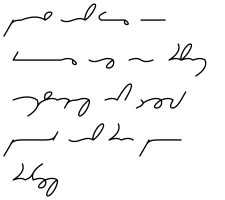

In [2424]:
show_grafoni_kerned_wrapped("there will come a time when you believe everything is finished that will be the beginning",shear_val=-1/sqrt(3),wrap=40)

#potential ligatures
* k lv1
* th r
* ~~f r~~
* ~~f l~~
* s m
* s n
* ~~s f~~
* k sh
* sh r
* m p
* m p
* ~~n t~~
* ~~n d~~

In [2425]:
show_kern("f","t",-1,-1)

In [2426]:
def print_pair(l,ll):
    return str(concat(letter_forms[l],letter_forms[ll]))

print(print_pair("f","t"))

[('quadratic', 2, 2, 0, 4), ('cubic', 2, 2, 0, 2, 2, 0), ('quadratic', 4, 0, 4, -2), ('line', 4, -4), ('line', 4, 0)]


In [2427]:
[1,2].reverse()

In [2428]:
def rev(strokes):
    points = [0,0]
    for s in strokes:
        if s[0] == 'move':
            points += [s[1],s[2]]
        if s[0] == 'line':
            points += [s[1],s[2]]
        if s[0] == 'quadratic':
            points += [s[1],s[2],s[3],s[4]]
        if s[0] == 'cubic':
            points += [s[1],s[2],s[3],s[4],s[5],s[6]]
    points.reverse()
    tx,ty = points[1],points[0]
    idx = 2

    strokes = strokes.copy()
    strokes.reverse()

    out = []

    for s in strokes:
        if s[0] == 'move':
            out.append(('move',-points[idx+1],points[idx+0]))
            idx += 2
        if s[0] == 'line':
            out.append(('line',-points[idx+1],points[idx+0]))
            idx += 2
        if s[0] == 'quadratic':
            out.append(('quadratic',-points[idx+1],points[idx+0],-points[idx+3],points[idx+2]))
            idx += 4
        if s[0] == 'cubic':
            out.append(('cubic',-points[idx+1],points[idx+0],-points[idx+3],points[idx+2],-points[idx+5],points[idx+4]))
            idx += 6

    return translate(out,tx,-ty)

In [2429]:
print(rev(ligatures["z_v"]))

[('cubic', 1, 0, 1, 8, 2, 8), ('quadratic', 1, 8, 1, 0), ('quadratic', 1, -8, 2, -8), ('quadratic', 3, -8, 3, 0)]


In [2430]:
ligatures = {
    "n_t": [('cubic',1,2,1,4,0,4),('cubic',-1,4,-1,2,0,0),('quadratic',1,-2,1,-4),('line',1,0)],
    "n_d": [('cubic',1,2,1,4,0,4),('cubic',-1,4,-1,2,0,0),('quadratic',1,-2,1,-4),('line',1,-8),('line',1,0)],
    "ng_t": [('cubic', 1, 2, 1, 8, 0, 8), ('cubic', -1, 8, -1, 2, 0, 0), ('quadratic',1,-2,1,-4),('line',1,0)],
    "ng_d": [('cubic', 1, 2, 1, 8, 0, 8), ('cubic', -1, 8, -1, 2, 0, 0), ('quadratic',1,-2,1,-4),('line',1,-8),('line',1,0)],
    
    "r_th": [('cubic',1,-2,1,-4,0,-4),('cubic',-1,-4,-1,-2,0,0),('quadratic',1,2,1,4),('line',1,0)],
    "r_dh": [('cubic',1,-2,1,-4,0,-4),('cubic',-1,-4,-1,-2,0,0),('quadratic',1,2,1,4),('line',1,8),('line',1,0)],
    "l_th": [('cubic', 1, -2, 1, -8, 0, -8), ('cubic', -1, -8, -1, -2, 0, 0), ('quadratic',1,2,1,4),('line',1,0)],
    "l_dh": [('cubic', 1, -2, 1, -8, 0, -8), ('cubic', -1, -8, -1, -2, 0, 0), ('quadratic',1,2,1,4),('line',1,8),('line',1,0)],
    
    "n_t-end": [('cubic',2,2,2,4,1,4),('cubic',0,4,0,2,0,0),('line',0,-4),('move',0,0)],
    "n_d-end": [('cubic',2,2,2,4,1,4),('cubic',0,4,0,2,0,0),('line',0,-8),('move',0,0)],
    "ng_t-end": [('cubic',2,2,2,8,1,8),('cubic',0,8,0,2,0,0),('line',0,-4),('move',0,0)],
    "ng_d-end": [('cubic',2,2,2,8,1,8),('cubic',0,8,0,2,0,0),('line',0,-8),('move',0,0)],
    "th-beg_r": [('move',0,4),('line',0,0),('cubic',0,-2,0,-4,-1,-4),('cubic',-2,-4,-2,-2,0,0)],
    "th-beg_l": [('move',0,4),('line',0,0),('cubic',0,-2,0,-8,-1,-8),('cubic',-2,-8,-2,-2,0,0)],
    "dh-beg_r": [('move',0,8),('line',0,0),('cubic',0,-2,0,-4,-1,-4),('cubic',-2,-4,-2,-2,0,0)],
    "dh-beg_l": [('move',0,8),('line',0,0),('cubic',0,-2,0,-8,-1,-8),('cubic',-2,-8,-2,-2,0,0)],

    "r_th-end": [('cubic',2,-2,2,-4,1,-4),('cubic',0,-4,0,-2,0,0),('line',0,4),('move',0,0)],
    "r_dh-end": [('cubic',2,-2,2,-4,1,-4),('cubic',0,-4,0,-2,0,0),('line',0,8),('move',0,0)],
    "l_th-end": [('cubic',2,-2,2,-8,1,-8),('cubic',0,-8,0,-2,0,0),('line',0,4),('move',0,0)],
    "l_dh-end": [('cubic',2,-2,2,-8,1,-8),('cubic',0,-8,0,-2,0,0),('line',0,8),('move',0,0)],
    
    "n_s": [('cubic',2,2,2,4,1,4),('cubic',0,4,0,2,0,0), ('quadratic', 0, -4, 1, -4), ('quadratic', 2, -4, 2, 0)],
    "n_z": [('cubic',2,2,2,4,1,4),('cubic',0,4,0,2,0,0), ('quadratic', 0, -8, 1, -8), ('quadratic', 2, -8, 2, 0)],
    "ng_s": [('cubic',2,2,2,8,1,8),('cubic',0,8,0,2,0,0), ('quadratic', 0, -4, 1, -4), ('quadratic', 2, -4, 2, 0)],
    "ng_z": [('cubic',2,2,2,8,1,8),('cubic',0,8,0,2,0,0), ('quadratic', 0, -8, 1, -8), ('quadratic', 2, -8, 2, 0)],   

    "th_uv1": [('line',0,4),('line',0,2),('cubic',0,0,1*vowel_scale,-1*vowel_scale,2*vowel_scale,0)],
    "th_uv2": [('line',0,4),('line',0,2),('cubic',0,0,2*vowel_scale,-2*vowel_scale,4*vowel_scale,0)],
    "th_uv3": [('line',0,4),('line',0,2),('cubic',0,0,4*vowel_scale,-4*vowel_scale,8*vowel_scale,0)],
    "dh_uv1": [('line',0,8),('line',0,2),('cubic',0,0,1*vowel_scale,-1*vowel_scale,2*vowel_scale,0)],
    "dh_uv2": [('line',0,8),('line',0,2),('cubic',0,0,2*vowel_scale,-2*vowel_scale,4*vowel_scale,0)],
    "dh_uv3": [('line',0,8),('line',0,2),('cubic',0,0,4*vowel_scale,-4*vowel_scale,8*vowel_scale,0)],
    "lv1_t": [('cubic',1*vowel_scale,1*vowel_scale,2*vowel_scale,0,2*vowel_scale,-2),('line',2*vowel_scale,-4),('line',2*vowel_scale,0)],
    "lv2_t": [('cubic',2*vowel_scale,2*vowel_scale,4*vowel_scale,0,4*vowel_scale,-2),('line',4*vowel_scale,-4),('line',4*vowel_scale,0)],
    "lv3_t": [('cubic',4*vowel_scale,4*vowel_scale,8*vowel_scale,0,8*vowel_scale,-2),('line',8*vowel_scale,-4),('line',8*vowel_scale,0)],
    "lv1_d": [('cubic',1*vowel_scale,1*vowel_scale,2*vowel_scale,0,2*vowel_scale,-2),('line',2*vowel_scale,-8),('line',2*vowel_scale,0)],
    "lv2_d": [('cubic',2*vowel_scale,2*vowel_scale,4*vowel_scale,0,4*vowel_scale,-2),('line',4*vowel_scale,-8),('line',4*vowel_scale,0)],
    "lv3_d": [('cubic',4*vowel_scale,4*vowel_scale,8*vowel_scale,0,8*vowel_scale,-2),('line',8*vowel_scale,-8),('line',8*vowel_scale,0)],

    "s_f": [('quadratic', 0, -4, 1, -4), ('quadratic', 2, -4, 2, 0), ('quadratic', 2, 4, 1, 4), ('cubic', 2, 4, 2, 0, 3, 0)],
    "z_f": [('quadratic', 0, -8, 1, -8), ('quadratic', 2, -8, 2, 0), ('quadratic', 2, 4, 1, 4), ('cubic', 2, 4, 2, 0, 3, 0)],
    "s_v": [('quadratic', 0, -4, 1, -4), ('quadratic', 2, -4, 2, 0), ('quadratic', 2, 8, 1, 8), ('cubic', 2, 8, 2, 0, 3, 0)],
    "z_v": [('quadratic', 0, -8, 1, -8), ('quadratic', 2, -8, 2, 0), ('quadratic', 2, 8, 1, 8), ('cubic', 2, 8, 2, 0, 3, 0)],
    "h_s": [('cubic', 1, 0, 1, 4, 2, 4), ('quadratic', 1, 4, 1, 0), ('quadratic', 1, -4, 2, -4), ('quadratic', 3, -4, 3, 0)],
    "h_z": [('cubic', 1, 0, 1, 4, 2, 4), ('quadratic', 1, 4, 1, 0), ('quadratic', 1, -8, 2, -8), ('quadratic', 3, -8, 3, 0)],
    "x_s": [('cubic', 1, 0, 1, 8, 2, 8), ('quadratic', 1, 8, 1, 0), ('quadratic', 1, -4, 2, -4), ('quadratic', 3, -4, 3, 0)],
    "x_z": [('cubic', 1, 0, 1, 8, 2, 8), ('quadratic', 1, 8, 1, 0), ('quadratic', 1, -8, 2, -8), ('quadratic', 3, -8, 3, 0)],
    "sh_p": [('quadratic', 0, 4, 1, 4), ('quadratic', 2, 4, 2, 0), ('quadratic', 2, -4, 1, -4), ('cubic', 2, -4, 2, 0, 3, 0)],
    "zh_p": [('quadratic', 0, 8, 1, 8), ('quadratic', 2, 8, 2, 0), ('quadratic', 2, -4, 1, -4), ('cubic', 2, -4, 2, 0, 3, 0)],
    "sh_b": [('quadratic', 0, 4, 1, 4), ('quadratic', 2, 4, 2, 0), ('quadratic', 2, -8, 1, -8), ('cubic', 2, -8, 2, 0, 3, 0)],
    "zh_b": [('quadratic', 0, 8, 1, 8), ('quadratic', 2, 8, 2, 0), ('quadratic', 2, -8, 1, -8), ('cubic', 2, -8, 2, 0, 3, 0)],
    "k_sh": [('cubic', 1, 0, 1, -4, 2, -4), ('quadratic', 1, -4, 1, 0), ('quadratic', 1, 4, 2, 4), ('quadratic', 3, 4, 3, 0)],
    "k_zh": [('cubic', 1, 0, 1, -4, 2, -4), ('quadratic', 1, -4, 1, 0), ('quadratic', 1, 8, 2, 8), ('quadratic', 3, 8, 3, 0)],
    "g_sh": [('cubic', 1, 0, 1, -8, 2, -8), ('quadratic', 1, -8, 1, 0), ('quadratic', 1, 4, 2, 4), ('quadratic', 3, 4, 3, 0)],
    "g_zh": [('cubic', 1, 0, 1, -8, 2, -8), ('quadratic', 1, -8, 1, 0), ('quadratic', 1, 8, 2, 8), ('quadratic', 3, 8, 3, 0)],
        
    "v_r": [('quadratic', 2, 4, 0, 8), ('cubic', 2, 4, 0, 2, 1, 0), ('cubic', 2, -2, 2, -4, 1, -4), ('cubic', 0, -4, 0, -2, 1, 0)],
    "v_l": [('quadratic', 2, 4, 0, 8), ('cubic', 2, 4, 0, 2, 1, 0), ('cubic', 2, -4, 2, -8, 1, -8), ('cubic', 0, -8, 0, -4, 1, 0)],
    "f_r": [('quadratic', 2, 2, 0, 4), ('cubic', 2, 2, 0, 1, 1, 0), ('cubic', 2, -2, 2, -4, 1, -4), ('cubic', 0, -4, 0, -2, 1, 0)],
    "f_l": [('quadratic', 2, 2, 0, 4), ('cubic', 2, 2, 0, 1, 1, 0), ('cubic', 2, -4, 2, -8, 1, -8), ('cubic', 0, -8, 0, -4, 1, 0)],
    "n_k": [('cubic', 1, 2, 1, 4, 0, 4), ('cubic', -1, 4, -1, 2, 0, 0), ('cubic', 1, -1, -1, -2, 1, -4), ('quadratic', -1, -2, 1, 0)],
    "n_g": [('cubic', 1, 2, 1, 4, 0, 4), ('cubic', -1, 4, -1, 2, 0, 0), ('cubic', 1, -2, -1, -4, 1, -8), ('quadratic', -1, -4, 1, 0)],
    "ng_k": [('cubic', 1, 2, 1, 8, 0, 8), ('cubic', -1, 8, -1, 2, 0, 0), ('cubic', 1, -1, -1, -2, 1, -4), ('quadratic', -1, -2, 1, 0)],
    "ng_g": [('cubic', 1, 2, 1, 8, 0, 8), ('cubic', -1, 8, -1, 2, 0, 0), ('cubic', 1, -2, -1, -4, 1, -8), ('quadratic', -1, -4, 1, 0)],
    
    "f-beg_r": [('move', 0, 4), ('quadratic', 2, 3, 2, 0), ('cubic', 2, -2, 2, -4, 1, -4), ('cubic', 0, -4, 0, -2, 2, 0)],
    "f-beg_l": [('move', 0, 4), ('quadratic', 2, 3, 2, 0), ('cubic', 2, -4, 2, -8, 1, -8), ('cubic', 0, -8, 0, -4, 2, 0)],
    "n_k-end": [('cubic', 2, 2, 2, 4, 1, 4), ('cubic', 0, 4, 0, 2, 0, 0), ('quadratic', 0, -3, 2, -4), ('move', 2, 0)],
    "ng_k-end": [('cubic', 2, 4, 2, 8, 1, 8), ('cubic', 0, 8, 0, 4, 0, 0), ('quadratic', 0, -3, 2, -4), ('move', 2, 0)],

    "f_s": [('quadratic', 2, 2, 0, 4), ('cubic', 1, 3, 1.5, 2,1.5,0), ('quadratic', 1.5, -4, 2.5, -4), ('quadratic', 3.5, -4, 3.5, 0)],
    "f_z": [('quadratic', 2, 2, 0, 4), ('cubic', 1, 3, 1.5, 2,1.5,0), ('quadratic', 1.5, -8, 2.5, -8), ('quadratic', 3.5, -8, 3.5, 0)],   
    "v_s": [('quadratic', 2, 4, 0, 8), ('cubic', 1, 6, 1.5, 4,1.5,0), ('quadratic', 1.5, -4, 2.5, -4), ('quadratic', 3.5, -4, 3.5, 0)],
    "v_z": [('quadratic', 2, 4, 0, 8), ('cubic', 1, 6, 1.5, 4,1.5,0), ('quadratic', 1.5, -8, 2.5, -8), ('quadratic', 3.5, -8, 3.5, 0)],

    "f_t-end": [('quadratic', 2, 2, 0, 4), ('cubic', 1, 3, 1.5, 2,1.5,0), ('line', 1.5, -4), ('move', 1.5, 0)],
    "f_d-end": [('quadratic', 2, 2, 0, 4), ('cubic', 1, 3, 1.5, 2,1.5,0), ('line', 1.5, -8), ('move', 1.5, 0)],
    "v_t-end": [('quadratic', 2, 4, 0, 8), ('cubic', 1, 6, 1.5, 4,1.5,0), ('line', 1.5, -4), ('move', 1.5, 0)],
    "v_d-end": [('quadratic', 2, 4, 0, 8), ('cubic', 1, 6, 1.5, 4,1.5,0), ('line', 1.5, -8), ('move', 1.5, 0)],

    "f_t": [('quadratic', 2, 2, 0, 4), ('cubic', 2, 2, 0, 2, 2, 0), ('quadratic', 3, -1, 3, -2), ('line', 3, -4), ('line', 3, 0)],
    "f_d": [('quadratic', 2, 2, 0, 4), ('cubic', 2, 2, 0, 2, 2, 0), ('quadratic', 3, -1, 3, -2), ('line', 3, -8), ('line', 3, 0)],
    "v_t": [('quadratic', 2, 4, 0, 8), ('cubic', 2, 4, 0, 4, 2, 0), ('quadratic', 3, -2, 3, -3), ('line', 3, -4), ('line', 3, 0)],
    "v_d": [('quadratic', 2, 4, 0, 8), ('cubic', 2, 4, 0, 4, 2, 0), ('quadratic', 3, -2, 3, -3), ('line', 3, -8), ('line', 3, 0)],

    # "m_s": [('cubic', 3, 0, 0, 3, 0, 0), ('quadratic', 0, -4, 1, -4), ('quadratic', 2, -4, 2, 0)],
    # "m_z": [('cubic', 3, 0, 0, 3, 0, 0), ('quadratic', 0, -8, 1, -8), ('quadratic', 2, -8, 2, 0)],

    # "s_m": [('quadratic', 0, -4, 1, -4), ('quadratic', 2, -4, 2, 0), ('cubic', 2, 3, -1, 0, 2, 0)],
    # "z_m": [('quadratic', 0, -8, 1, -8), ('quadratic', 2, -8, 2, 0), ('cubic', 2, 3, -1, 0, 2, 0)]
}

In [2431]:
display(svgStrokes([('move',0,0)]+ligatures["v_t"]))

In [2432]:
def make_ligatures(in_list):
    out = []
    last = "None"
    for c in in_list:
        potential = last + "_" + c
        if potential in ligatures:
            out.append(potential) 
            last = "None"
        else:
            if last != "None":
                out.append(last)
            last = c
    if last != "None":
        out.append(last)
    return out

make_ligatures(["s", "t", "uv3", "n", "d", "z", " ", "s", "uv1", "ng"])

['s', 't', 'uv3', 'n_d', 'z', ' ', 's', 'uv1', 'ng']

In [2433]:
["s", "t", "uv3", "n", "d"]

['s', 't', 'uv3', 'n', 'd']

In [2434]:
def first(string):
    parts = string.split("_")
    if len(parts) == 0:
        return " "
    else:
        return parts[0]

def last(string):
    parts = string.split("_")
    if len(parts) == 0:
        return " "
    else:
        return parts[-1]

In [2435]:
def show_grafoni_kerned_wrapped_ligs(in_string,wrap = 100,shear_val=-1,line_space=20,v_scale=0.5):
    chars = in_string
    if isinstance(chars, str):
        chars = make_ligatures(process_ends(grafoni_spell(in_string)))
    print(" ".join(chars))
    out = [('move',0,0)]
    last_char = " "
    for l in chars:
        if l in letter_forms:
            l_kern,r_kern = kerning[(last(last_char),first(l))]
            last_char = l
            out = concat(r_extend(out,l_kern),l_extend(letter_forms[l],r_kern))
        elif l in ligatures:
            l_kern,r_kern = kerning[(last(last_char),first(l))]
            last_char = l
            out = concat(r_extend(out,l_kern),l_extend(ligatures[l],r_kern))
        else:
            print("error: " + l)
        if last_char == " "  and out[-1][-2] + shear_val*v_scale*out[-1][-1] > wrap:
            out.append(('move',-shear_val*v_scale*(out[-1][-1]+line_space),out[-1][-1]+line_space))
    return display(svgStrokes(shear(scale(out,1,v_scale),by=shear_val)))

s t uv3 n_d z   v uv2 n_t uv1 ng   dh mv2   dh_uv2 r   s_f uv1 r   f-beg_r uv3 n_s   f-beg_l mv3 uv1 t-end


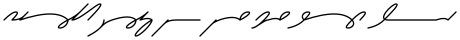

In [2436]:
show_grafoni_kerned_wrapped_ligs("stands venting the there sphere france flight")

s t uv3 n d z   v uv2 n t uv1 ng   dh mv2   dh uv2 r   s f uv1 r   f-beg r uv3 n s   f-beg l mv3 uv1 t-end


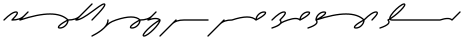

In [2437]:

show_grafoni_kerned_wrapped("stands venting the there sphere france flight")

dh_uv2 r   lv1 uv1 l   k-beg mv2 m   mv2   t-beg mv3 uv1 m   lv1 uv1 n   uv1 lv1   b-beg uv1 l uv1 uv1 v-end   uv2 v_r uv1 uv1 th_uv1 ng   uv1 z   f uv1 n uv1 sh t-end   dh mv2 t   lv1 uv1 l   b-beg uv1 uv1   dh mv2   b-beg uv1 g uv1 n uv1 ng


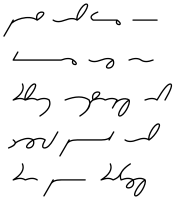

In [2438]:
show_grafoni_kerned_wrapped_ligs("there will come a time when you believe everything is finished that will be the beginning",shear_val=-1/sqrt(3),wrap=35)

dh uv2 r   lv1 uv1 l   k-beg mv2 m   mv2   t-beg mv3 uv1 m   lv1 uv1 n   uv1 lv1   b-beg uv1 l uv1 uv1 v-end   uv2 v r uv1 uv1 th uv1 ng   uv1 z   f uv1 n uv1 sh t-end   dh mv2 t   lv1 uv1 l   b-beg uv1 uv1   dh mv2   b-beg uv1 g uv1 n uv1 ng


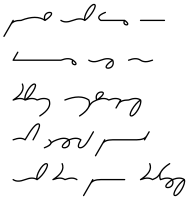

In [2439]:
show_grafoni_kerned_wrapped("there will come a time when you believe everything is finished that will be the beginning",shear_val=-1/sqrt(3),wrap=35)

uv1 Y uv1 l d-end   lv1 W lv1_d   s t mv2 d uv1 uv1 Y uv1 ng


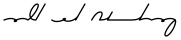

In [2440]:
show_grafoni_kerned_wrapped_ligs("yield wooed studying",shear_val=-1/sqrt(3),wrap=35)

mv3 uv1   r uv1 uv1 mv2 l mv3 uv1 z d-end ,   dh mv2   m lv2 mv1 m mv2 n_t-end   mv3 uv1   f uv2 l   uv1 n_t lv1   dh mv2   f uv1 sh mv2 r ,   dh mv2 t   dh mv2   b-beg mv1 k-end   lv1 mv1 d   n mv3 t   b-beg uv1 uv1   d-beg uv1 s t r lv3 uv1 d-end   uv2 z   mv3 uv1   h-beg uv3 d-end   p-beg l uv3 n_d-end .   uv1 t-end   k-beg mv2 n_t uv1 n uv1 lv1_d   f-beg mv3 l uv1 ng   uv1 n_t lv1   dh mv2 t   s t mv3 r uv1 uv1   uv1 k s p uv3 n_s   mv2 v-end   lv1 uv1 t sh   mv3 uv1   h-beg uv3 d-end   lv2 mv1 n l uv1 uv1   mv2   f-beg_l uv1 uv1 t uv1 ng   g-beg l uv1 m p s .   mv3 uv1   h-beg uv3 v-end   t-beg r mv3 uv1 d-end   t-beg uv1   s p uv2 k uv1 mv2 l uv2 uv1 t-end   lv1 uv2 r   uv1 t-end   m mv3 uv1 t-end   h-beg uv3 v-end   l uv3 n_d uv1 d-end ,   b-beg mv2 t   mv3 uv1   m mv2 s t-end   mv2 d m uv1 t-end ,   h-beg lv2 lv1 uv2 v uv2 r - s lv1 c h-end   k-beg mv2 n_d zh uv2 k t sh mv2 r   uv1 z   f uv1 lv1_t mv2 l .   s t uv1 l ,   dh mv2   k-beg lv1 uv2 sh mv2 n   mv2 v-end   h-beg lv1 z

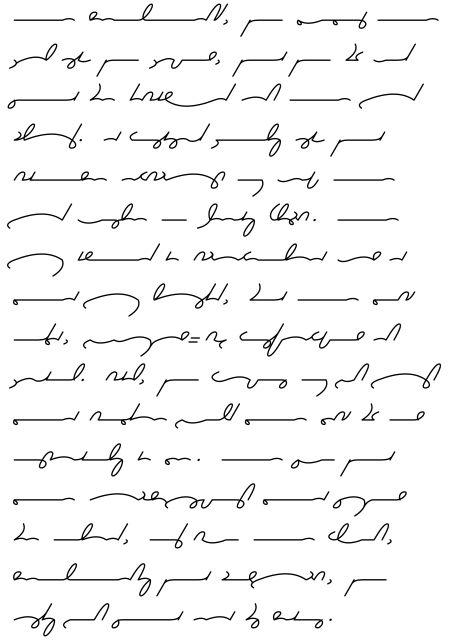

In [2441]:
show_grafoni_kerned_wrapped_ligs("I realized, the moment I fell into the fissure, that the book would not be destroyed as I had planned. It continued falling into that starry expanse of which I had only a fleeting glimpse. I have tried to speculate where it might have landed, but I must admit, however-such conjecture is futile. Still, the question of whose hands might someday hold my mist book are unsettling to me. I know that my apprehensions might never be allayed, and so I close, realizing that perhaps, the ending has not yet been written.",shear_val=-1/sqrt(3),wrap=95)

dh mv2   th_uv1 ng   dh mv2 t   h-beg uv1 uv1   lv1 mv3 z   mv2 b mv3 mv1 t   t-beg uv1   d-beg lv1   lv1 mv3 z   t-beg uv1   lv2 mv1 p mv2 n   mv2   d-beg mv3 uv1 mv2 r uv1 uv1 .   dh_uv1 s   lv1 mv3 z   n mv3 t   uv1 l uv1 uv1 g mv2 l   ( n mv2 th_uv1 ng   lv1 mv3 z   uv1 l uv1 uv1 g mv2 l ,   s uv1 n_s   dh_uv2 r   lv1 mv2 r   n lv2 mv1   l lv3 ng_g mv2 r   uv2 n uv1 uv1   l lv3 z ) ,   b-beg mv2 t   uv1 f-end   d-beg uv1 t uv2 k t uv1 d-end   uv1 t-end   lv1 mv3 z   r uv1 uv1 z mv2 n mv2 b l uv1 uv1   s mv2 r t mv2 n   dh mv2 t   uv1 t-end   lv1 mv1 d   b-beg uv1 uv1   p-beg mv2 n uv1 sh t-end   b-beg mv3 uv1   d-beg uv2 th-end ,   mv2 r   uv3 t-end   l uv1 uv1 s t-end   b-beg mv3 uv1   t-beg lv1 uv2 n_t uv1 uv1 f mv3 uv1 v-end   uv1 uv1 r z   uv1 n   mv2   f-beg lv2 r c uv2 d-end - l mv3 b lv2 lv1 r   k-beg uv3 m p-end .   lv1 uv1 n_s t mv2 n   f uv1 t uv1 d-end   mv2   n uv1 b-end   uv1 n_t lv1   dh mv2   p-beg uv2 n h lv2 l d uv2 r   mv2 n_d-end   s mv2 k t-end   uv1 t-end   t-b

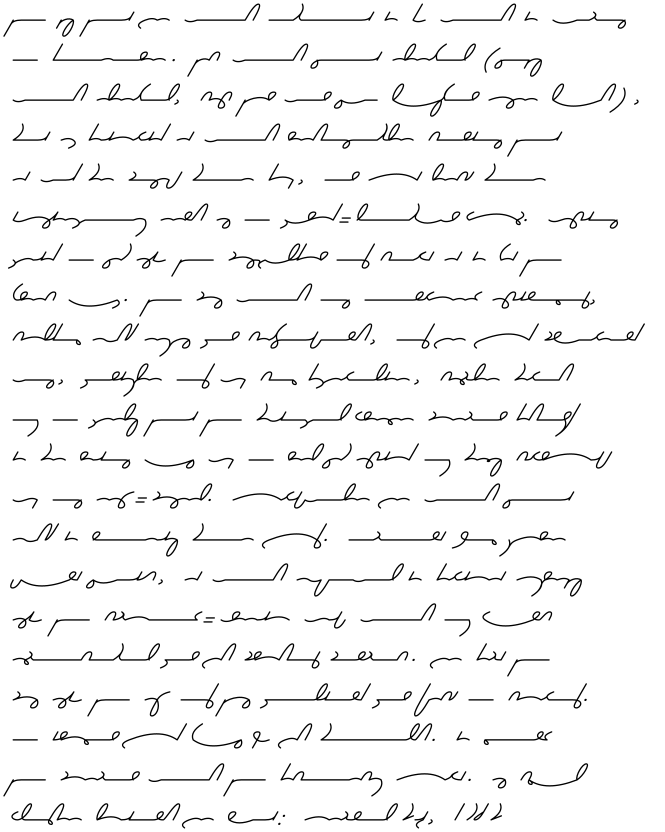

In [2442]:
show_grafoni_kerned_wrapped_ligs("""The thing that he was about to do was to open a diary. This was not illegal
(nothing was illegal, since there were no longer any laws), but if detected
it was reasonably certain that it would be punished by death, or at least by
twenty-five years in a forced-labour camp. Winston
fitted a nib into the penholder and sucked it to get the grease off.
The pen was an archaic instrument, seldom used even for
signatures, and he had procured one, furtively and with some
difficulty, simply because of a feeling that the beautiful creamy paper
deserved to be written on with a real nib instead of being scratched with
an ink-pencil. Actually he was not used to writing by hand.
Apart from very short notes, it was usual to dictate everything into the
speak-write which was of course impossible for his present purpose.
He dipped the pen into the ink and then faltered for just a second. A
tremor had gone through his bowels. To mark the paper was the decisive
act. In small clumsy letters he wrote: April 4th, 1984.""",shear_val=-1/sqrt(3),wrap=135)

In [2443]:
# def v_nudge(paths,nudge_size = 0.1):
#     if nudge_size < 0:
#         return paths
#     paths = paths.copy()
#     last = list(paths[-1])
#     last[-1] = last[-1]-nudge_size
#     paths[-1] = tuple(last)
#     paths.append(('line',last[-2],last[-1]+nudge_size))
#     return paths

def v_nudge(paths,nudge_size = 0.1):
    if nudge_size < 0:
        return paths
    paths = paths.copy()
    last = paths[-1]
    paths+=[('quadratic',last[-2]+nudge_size,last[-1],last[-2]+nudge_size,last[-1]+nudge_size),('line',last[-2]+nudge_size,last[-1])]
    return paths


In [2444]:
nudge_kern = defaultdict(lambda:-1)
nudge_kern[('mv1','mv1')] = 1
nudge_kern[('mv2','mv1')] = 1
nudge_kern[('mv3','mv1')] = 1
nudge_kern[('mv1','mv2')] = 1
nudge_kern[('mv2','mv2')] = 1
nudge_kern[('mv3','mv2')] = 1
nudge_kern[('mv1','mv3')] = 1
nudge_kern[('mv2','mv3')] = 1
nudge_kern[('mv3','mv3')] = 1

In [2445]:
def show_grafoni_kerned_wrapped_ligs_tick(in_string,wrap = 100,shear_val=-1/sqrt(3),line_space=20,v_scale=0.5):
    chars = in_string
    if isinstance(chars, str):
        chars = make_ligatures(process_ends(grafoni_spell(in_string)))
    print(" ".join(chars))
    out = [('move',0,0)]
    last_char = " "
    for l in chars:
        if l in letter_forms:
            l_kern,r_kern = kerning[(last(last_char),first(l))]
            n_val = nudge_kern[(last(last_char),first(l))]
            last_char = l
            out = concat(v_nudge(r_extend(out,l_kern),n_val),l_extend(letter_forms[l],r_kern))
        elif l in ligatures:
            l_kern,r_kern = kerning[(last(last_char),first(l))]
            n_val = nudge_kern[(last(last_char),first(l))]
            last_char = l
            out = concat(v_nudge(r_extend(out,l_kern),n_val),l_extend(ligatures[l],r_kern))
        else:
            print("error: " + l)
        if last_char == " "  and out[-1][-2] + shear_val*v_scale*out[-1][-1] > wrap:
            out.append(('move',-shear_val*v_scale*(out[-1][-1]+line_space),out[-1][-1]+line_space))
    return display(svgStrokes(shear(scale(out,1,v_scale),by=shear_val)))

dh mv2   th_uv1 ng   dh mv2 t   h-beg uv1 uv1   lv1 mv3 z   mv2 b mv3 mv1 t   t-beg uv1   d-beg lv1   lv1 mv3 z   t-beg uv1   lv2 mv1 p mv2 n   mv2   d-beg mv3 uv1 mv2 r uv1 uv1 .   dh_uv1 s   lv1 mv3 z   n mv3 t   uv1 l uv1 uv1 g mv2 l   ( n mv2 th_uv1 ng   lv1 mv3 z   uv1 l uv1 uv1 g mv2 l ,   s uv1 n_s   dh_uv2 r   lv1 mv2 r   n lv2 mv1   l lv3 ng_g mv2 r   uv2 n uv1 uv1   l lv3 z ) ,   b-beg mv2 t   uv1 f-end   d-beg uv1 t uv2 k t uv1 d-end   uv1 t-end   lv1 mv3 z   r uv1 uv1 z mv2 n mv2 b l uv1 uv1   s mv2 r t mv2 n   dh mv2 t   uv1 t-end   lv1 mv1 d   b-beg uv1 uv1   p-beg mv2 n uv1 sh t-end   b-beg mv3 uv1   d-beg uv2 th-end ,   mv2 r   uv3 t-end   l uv1 uv1 s t-end   b-beg mv3 uv1   t-beg lv1 uv2 n_t uv1 uv1 f mv3 uv1 v-end   uv1 uv1 r z   uv1 n   mv2   f-beg lv3 r s t-end     l uv2 uv1 b mv2 r   k-beg uv3 m p-end .   lv1 uv1 n_s t mv2 n   f uv1 t uv1 d-end   mv2   n uv1 b-end   uv1 n_t lv1   dh mv2   p-beg uv2 n h lv2 l d uv2 r   mv2 n_d-end   s mv2 k t-end   uv1 t-end   t-beg

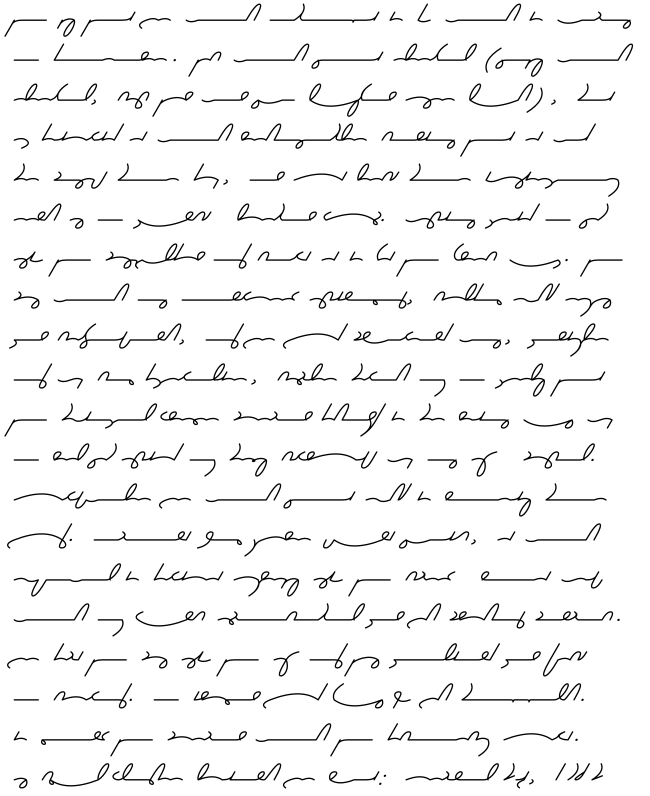

In [2446]:
show_grafoni_kerned_wrapped_ligs_tick("""The thing that he was about to do was to open a diary. This was not illegal
(nothing was illegal, since there were no longer any laws), but if detected
it was reasonably certain that it would be punished by death, or at least by
twenty-five years in a forced - labour camp. Winston
fitted a nib into the penholder and sucked it to get the grease off.
The pen was an archaic instrument, seldom used even for
signatures, and he had procured one, furtively and with some
difficulty, simply because of a feeling that the beautiful creamy paper
deserved to be written on with a real nib instead of being scratched with
an ink - pencil. Actually he was not used to writing by hand.
Apart from very short notes, it was usual to dictate everything into the
speak - write which was of course impossible for his present purpose.
He dipped the pen into the ink and then faltered for just a second. A
tremor had gone through his bowels. To mark the paper was the decisive
act. In small clumsy letters he wrote: April 4th, 1984.""",shear_val=-1/sqrt(3),wrap=145)

In [2447]:
show_grafoni_kerned_wrapped_ligs_tick("0123456789 0132459878511021318794965413212003149578945213201")

0 1 2 3 4 5 6 7 8 9   0 1 3 2 4 5 9 8 7 8 5 1 1 0 2 1 3 1 8 7 9 4 9 6 5 4 1 3 2 1 2 0 0 3 1 4 9 5 7 8 9 4 5 2 1 3 2 0 1


In [2448]:
print(make_ligatures(process_ends(grafoni_spell("""The thing that he was about to do was to open a diary. This was not illegal
(nothing was illegal, since there were no longer any laws), but if detected
it was reasonably certain that it would be punished by death, or at least by
twenty-five years in a forced labour camp. Winston
fitted a nib into the penholder and sucked it to get the grease off.
The pen was an archaic instrument, seldom used even for
signatures, and he had procured one, furtively and with some
difficulty, simply because of a feeling that the beautiful creamy paper
deserved to be written on with a real nib instead of being scratched with
an ink pencil. Actually he was not used to writing by hand.
Apart from very short notes, it was usual to dictate everything into the
speak write which was of course impossible for his present purpose.
He dipped the pen into the ink and then faltered for just a second. A
tremor had gone through his bowels. To mark the paper was the decisive
act. In small clumsy letters he wrote: April 4, 1984."""))))

['dh', 'mv2', ' ', 'th_uv1', 'ng', ' ', 'dh', 'mv2', 't', ' ', 'h-beg', 'uv1', 'uv1', ' ', 'lv1', 'mv3', 'z', ' ', 'mv2', 'b', 'mv3', 'mv1', 't', ' ', 't-beg', 'uv1', ' ', 'd-beg', 'lv1', ' ', 'lv1', 'mv3', 'z', ' ', 't-beg', 'uv1', ' ', 'lv2', 'mv1', 'p', 'mv2', 'n', ' ', 'mv2', ' ', 'd-beg', 'mv3', 'uv1', 'mv2', 'r', 'uv1', 'uv1', '.', ' ', 'dh_uv1', 's', ' ', 'lv1', 'mv3', 'z', ' ', 'n', 'mv3', 't', ' ', 'uv1', 'l', 'uv1', 'uv1', 'g', 'mv2', 'l', ' ', '(', 'n', 'mv2', 'th_uv1', 'ng', ' ', 'lv1', 'mv3', 'z', ' ', 'uv1', 'l', 'uv1', 'uv1', 'g', 'mv2', 'l', ',', ' ', 's', 'uv1', 'n_s', ' ', 'dh_uv2', 'r', ' ', 'lv1', 'mv2', 'r', ' ', 'n', 'lv2', 'mv1', ' ', 'l', 'lv3', 'ng_g', 'mv2', 'r', ' ', 'uv2', 'n', 'uv1', 'uv1', ' ', 'l', 'lv3', 'z', ')', ',', ' ', 'b-beg', 'mv2', 't', ' ', 'uv1', 'f-end', ' ', 'd-beg', 'uv1', 't', 'uv2', 'k', 't', 'uv1', 'd-end', ' ', 'uv1', 't-end', ' ', 'lv1', 'mv3', 'z', ' ', 'r', 'uv1', 'uv1', 'z', 'mv2', 'n', 'mv2', 'b', 'l', 'uv1', 'uv1', ' ', 's', 'mv2',

In [2449]:
#fix the hyphens, and the 4th and the period at the end

fix = ['dh', 'mv2', ' ', 'th_uv1', 'ng', ' ', 'dh', 'mv2', 't', ' ', 'h-beg', 'uv1', 'uv1', ' ', 'lv1', 'mv3', 'z', ' ', 'mv2', 'b', 'mv3', 'mv1', 't', ' ', 't-beg', 'uv1', ' ', 'd-beg', 'lv1', ' ', 'lv1', 'mv3', 'z', ' ', 't-beg', 'uv1', ' ', 'lv2', 'mv1', 'p', 'mv2', 'n', ' ', 'mv2', ' ', 'd-beg', 'mv3', 'uv1', 'mv2', 'r', 'uv1', 'uv1', '.', ' ', 'dh_uv1', 's', ' ', 'lv1', 'mv3', 'z', ' ', 'n', 'mv3', 't', ' ', 'uv1', 'l', 'uv1', 'uv1', 'g', 'mv2', 'l', ' ', '(', 'n', 'mv2', 'th_uv1', 'ng', ' ', 'lv1', 'mv3', 'z', ' ', 'uv1', 'l', 'uv1', 'uv1', 'g', 'mv2', 'l', ',', ' ', 's', 'uv1', 'n_s', ' ', 'dh_uv2', 'r', ' ', 'lv1', 'mv2', 'r', ' ', 'n', 'lv2', 'mv1', ' ', 'l', 'lv3', 'ng_g', 'mv2', 'r', ' ', 'uv2', 'n', 'uv1', 'uv1', ' ', 'l', 'lv3', 'z', ')', ',', ' ', 'b-beg', 'mv2', 't', ' ', 'uv1', 'f-end', ' ', 'd-beg', 'uv1', 't', 'uv2', 'k', 't', 'uv1', 'd-end', ' ', 'uv1', 't-end', ' ', 'lv1', 'mv3', 'z', ' ', 'r', 'uv1', 'uv1', 'z', 'mv2', 'n', 'mv2', 'b', 'l', 'uv1', 'uv1', ' ', 's', 'mv2', 'r', 't', 'mv2', 'n', ' ', 'dh', 'mv2', 't', ' ', 'uv1', 't-end', ' ', 'lv1', 'mv1', 'd', ' ', 'b-beg', 'uv1', 'uv1', ' ', 'p-beg', 'mv2', 'n', 'uv1', 'sh', 't-end', ' ', 'b-beg', 'mv3', 'uv1', ' ', 'd-beg', 'uv2', 'th-end', ',', ' ', 'mv2', 'r', ' ', 'uv3', 't-end', ' ', 'l', 'uv1', 'uv1', 's', 't-end', ' ', 'b-beg', 'mv3', 'uv1', ' ', 't-beg', 'lv1', 'uv2', 'n_t', 'uv1', 'uv1', '-', 'f', 'mv3', 'uv1', 'v-end', ' ', 'uv1', 'uv1', 'r', 'z', ' ', 'uv1', 'n', ' ', 'mv2', ' ', 'f-beg', 'lv3', 'r', 's', 't-end', '-', 'l', 'uv2', 'uv1', 'b', 'mv2', 'r', ' ', 'k-beg', 'uv3', 'm', 'p-end', '.', ' ', 'lv1', 'uv1', 'n_s', 't', 'mv2', 'n', ' ', 'f', 'uv1', 't', 'uv1', 'd-end', ' ', 'mv2', ' ', 'n', 'uv1', 'b-end', ' ', 'uv1', 'n_t', 'lv1', ' ', 'dh', 'mv2', ' ', 'p-beg', 'uv2', 'n', 'h', 'lv2', 'l', 'd', 'uv2', 'r', ' ', 'mv2', 'n_d-end', ' ', 's', 'mv2', 'k', 't-end', ' ', 'uv1', 't-end', ' ', 't-beg', 'uv1', ' ', 'g-beg', 'uv1', 't-end', ' ', 'dh', 'mv2', ' ', 'g-beg', 'r', 'uv1', 'uv1', 's', ' ', 'lv3', 'f-end', '.', ' ', 'dh', 'mv2', ' ', 'p-beg', 'uv2', 'n', ' ', 'lv1', 'mv3', 'z', ' ', 'mv2', 'n', ' ', 'mv3', 'r', 'k', 'uv2', 'uv1', 'uv1', 'k-end', ' ', 'uv1', 'n_s', 't', 'r', 'mv2', 'm', 'mv2', 'n_t-end', ',', ' ', 's', 'uv2', 'l', 'd', 'mv2', 'm', ' ', 'uv1', 'lv1', 'z', 'd-end', ' ', 'uv1', 'uv1', 'v', 'uv1', 'n', ' ', 'f-beg', 'mv2', 'r', ' ', 's', 'uv1', 'g', 'n', 'mv2', 't', 'sh', 'mv2', 'r', 'z', ',', ' ', 'mv2', 'n_d-end', ' ', 'h-beg', 'uv1', 'uv1', ' ', 'h-beg', 'uv3', 'd-end', ' ', 'p-beg', 'r', 'lv2', 'mv1', 'k', 'uv1', 'mv1', 'r', 'd-end', ' ', 'lv1', 'mv2', 'n', ',', ' ', 'f-beg', 'mv2', 'r', 't', 'uv1', 'v_l', 'uv1', 'uv1', ' ', 'mv2', 'n_d-end', ' ', 'lv1', 'uv1', 'th-end', ' ', 's', 'mv2', 'm', ' ', 'd-beg', 'uv1', 'f', 'uv1', 'k', 'mv2', 'l', 't', 'uv1', 'uv1', ',', ' ', 's', 'uv1', 'm', 'p', 'l', 'uv1', 'uv1', ' ', 'b-beg', 'uv1', 'k', 'mv2', 'z', ' ', 'mv2', 'v-end', ' ', 'mv2', ' ', 'f', 'uv1', 'uv1', 'l', 'uv1', 'ng', ' ', 'dh', 'mv2', 't', ' ', 'dh', 'mv2', ' ', 'b-beg', 'uv1', 'lv1_t', 'mv2', 'f', 'mv2', 'l', ' ', 'k-beg', 'r', 'uv1', 'uv1', 'm', 'uv1', 'uv1', ' ', 'p-beg', 'uv2', 'uv1', 'p', 'mv2', 'r', ' ', 'd-beg', 'uv1', 'z', 'mv2', 'r', 'v_d-end', ' ', 't-beg', 'uv1', ' ', 'b-beg', 'uv1', 'uv1', ' ', 'r', 'uv1', 't', 'mv2', 'n', ' ', 'lv3', 'n', ' ', 'lv1', 'uv1', 'th-end', ' ', 'mv2', ' ', 'r', 'uv1', 'uv1', 'l', ' ', 'n', 'uv1', 'b-end', ' ', 'uv1', 'n_s', 't', 'uv2', 'd-end', ' ', 'mv2', 'v-end', ' ', 'b-beg', 'uv1', 'uv1', 'Y', 'uv1', 'ng', ' ', 's', 'k', 'r', 'uv3', 't', 'sh', 't-end', ' ', 'lv1', 'uv1', 'th-end', ' ', 'mv2', 'n', ' ', 'uv1', 'ng_k-end', '-', 'p-beg', 'uv2', 'n_s', 'mv2', 'l', '.', ' ', 'uv3', 'k', 't', 'sh', 'lv1', 'mv2', 'l', 'uv1', 'uv1', ' ', 'h-beg', 'uv1', 'uv1', ' ', 'lv1', 'mv3', 'z', ' ', 'n', 'mv3', 't', ' ', 'uv1', 'lv1', 'z', 'd-end', ' ', 't-beg', 'uv1', ' ', 'r', 'mv3', 'uv1', 't', 'uv1', 'ng', ' ', 'b-beg', 'mv3', 'uv1', ' ', 'h-beg', 'uv3', 'n_d-end', '.', ' ', 'mv2', 'p', 'mv3', 'r', 't-end', ' ', 'f-beg_r', 'mv2', 'm', ' ', 'v', 'uv2', 'r', 'uv1', 'uv1', ' ', 'sh', 'lv3', 'r', 't-end', ' ', 'n', 'lv2', 'mv1', 't', 's', ',', ' ', 'uv1', 't-end', ' ', 'lv1', 'mv3', 'z', ' ', 'uv1', 'lv1', 'zh', 'mv2', 'lv1', 'mv2', 'l', ' ', 't-beg', 'uv1', ' ', 'd-beg', 'uv1', 'k', 't', 'uv2', 'uv1', 't-end', ' ', 'uv2', 'v_r', 'uv1', 'uv1', 'th_uv1', 'ng', ' ', 'uv1', 'n_t', 'lv1', ' ', 'dh', 'mv2', ' ', 's', 'p', 'uv1', 'uv1', 'k-end', '-', 'r', 'mv3', 'uv1', 't-end', ' ', 'lv1', 'uv1', 't', 'sh', ' ', 'lv1', 'mv3', 'z', ' ', 'mv2', 'v-end', ' ', 'k-beg', 'lv3', 'r', 's', ' ', 'uv1', 'm', 'p', 'mv3', 's', 'mv2', 'b', 'mv2', 'l', ' ', 'f-beg', 'mv2', 'r', ' ', 'h-beg', 'uv1', 'z', ' ', 'p-beg', 'r', 'uv2', 'z', 'mv2', 'n_t-end', ' ', 'p-beg', 'mv2', 'r', 'p', 'mv2', 's', '.', ' ', 'h-beg', 'uv1', 'uv1', ' ', 'd-beg', 'uv1', 'p', 't-end', ' ', 'dh', 'mv2', ' ', 'p-beg', 'uv2', 'n', ' ', 'uv1', 'n_t', 'lv1', ' ', 'dh', 'mv2', ' ', 'uv1', 'ng_k-end', ' ', 'mv2', 'n_d-end', ' ', 'dh_uv2', 'n', ' ', 'f-beg', 'mv3', 'l', 't', 'mv2', 'r', 'd-end', ' ', 'f-beg', 'mv2', 'r', ' ', 'd-beg', 'zh', 'uv1', 's', 't-end', ' ', 'mv2', ' ', 's', 'uv2', 'k', 'mv2', 'n_d-end', '.', ' ', 'mv2', ' ', 't-beg', 'r', 'uv2', 'm', 'mv2', 'r', ' ', 'h-beg', 'uv3', 'd-end', ' ', 'g-beg', 'lv3', 'n', ' ', 'th-beg_r', 'lv1', ' ', 'h-beg', 'uv1', 'z', ' ', 'b-beg', 'mv3', 'mv1', 'mv2', 'l', 'z', '.', ' ', 't-beg', 'uv1', ' ', 'm', 'mv3', 'r', 'k-end', ' ', 'dh', 'mv2', ' ', 'p-beg', 'uv2', 'uv1', 'p', 'mv2', 'r', ' ', 'lv1', 'mv3', 'z', ' ', 'dh', 'mv2', ' ', 'd-beg', 'uv1', 's', 'mv3', 'uv1', 's', 'uv1', 'v-end', ' ', 'uv3', 'k', 't-end', '.', ' ', 'uv1', 'n', ' ', 's', 'm', 'lv3', 'l', ' ', 'k-beg', 'l', 'mv2', 'm', 'z', 'uv1', 'uv1', ' ', 'l', 'uv2', 't', 'mv2', 'r', 'z', ' ', 'h-beg', 'uv1', 'uv1', ' ', 'r', 'lv2', 'mv1', 't', ':', ' ', 'uv2', 'uv1', 'p', 'r', 'mv2', 'l', ' ', '4', 'th', ',', ' ', '1', '9', '8', '4', '.']

In [2450]:
kerning[("p-beg","r")]

(-1, 2.5)

p-beg r mv3 s p mv2 r   p-beg r mv2 m lv2 mv1 t   lv3_t mv2 m lv2 mv1 b uv1 uv1 l   mv2 r_th-end   th-beg_r uv1 uv1


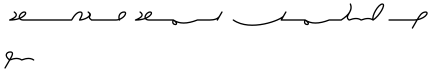

In [2451]:
show_grafoni_kerned_wrapped_ligs_tick("prosper promote automobile earth three")

dh mv2   th_uv1 ng   dh mv2 t   h-beg uv1 uv1   lv1 mv3 z   mv2 b mv3 mv1 t   t-beg uv1   d-beg lv1   lv1 mv3 z   t-beg uv1   lv2 mv1 p mv2 n   mv2   d-beg mv3 uv1 mv2 r uv1 uv1 .   dh_uv1 s   lv1 mv3 z   n mv3 t   uv1 l uv1 uv1 g mv2 l   ( n mv2 th_uv1 ng   lv1 mv3 z   uv1 l uv1 uv1 g mv2 l ,   s uv1 n_s   dh_uv2 r   lv1 mv2 r   n lv2 mv1   l lv3 ng_g mv2 r   uv2 n uv1 uv1   l lv3 z ) ,   b-beg mv2 t   uv1 f-end   d-beg uv1 t uv2 k t uv1 d-end   uv1 t-end   lv1 mv3 z   r uv1 uv1 z mv2 n mv2 b l uv1 uv1   s mv2 r t mv2 n   dh mv2 t   uv1 t-end   lv1 mv1 d   b-beg uv1 uv1   p-beg mv2 n uv1 sh t-end   b-beg mv3 uv1   d-beg uv2 th-end ,   mv2 r   uv3 t-end   l uv1 uv1 s t-end   b-beg mv3 uv1   t-beg lv1 uv2 n_t uv1 uv1 - f mv3 uv1 v-end   uv1 uv1 r z   uv1 n   mv2   f-beg lv3 r s t-end - l uv2 uv1 b mv2 r   k-beg uv3 m p-end .   lv1 uv1 n_s t mv2 n   f uv1 t uv1 d-end   mv2   n uv1 b-end   uv1 n_t lv1   dh mv2   p-beg uv2 n h lv2 l d uv2 r   mv2 n_d-end   s mv2 k t-end   uv1 t-end   t-beg

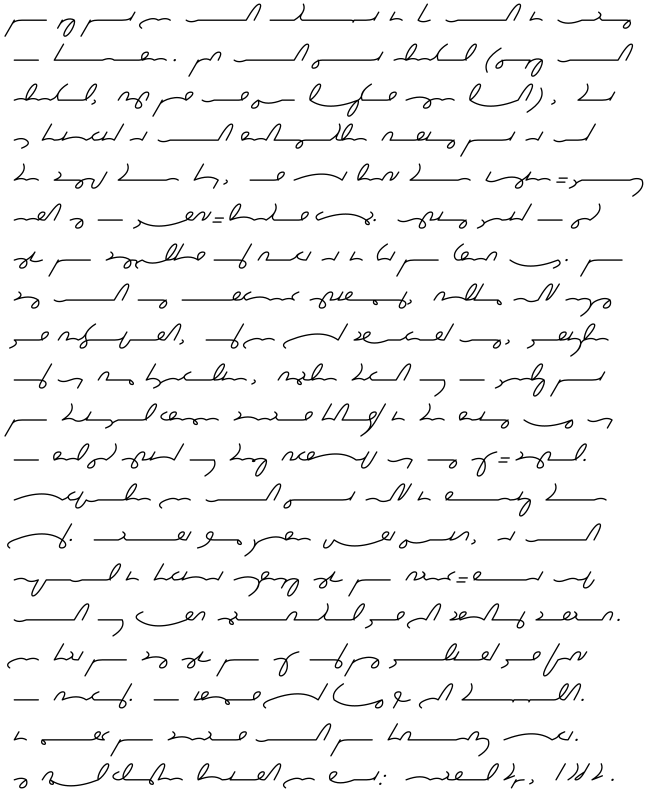

In [2452]:
show_grafoni_kerned_wrapped_ligs_tick(fix,shear_val=-1/sqrt(3),wrap=145)

mv3 uv1   r uv1 uv1 mv2 l mv3 uv1 z d-end ,   dh mv2   m lv2 mv1 m mv2 n_t-end   mv3 uv1   f uv2 l   uv1 n_t lv1   dh mv2   f uv1 sh mv2 r ,   dh mv2 t   dh mv2   b-beg mv1 k-end   lv1 mv1 d   n mv3 t   b-beg uv1 uv1   d-beg uv1 s t r lv3 uv1 d-end   uv2 z   mv3 uv1   h-beg uv3 d-end   p-beg l uv3 n_d-end .   uv1 t-end   k-beg mv2 n_t uv1 n uv1 lv1_d   f-beg mv3 l uv1 ng   uv1 n_t lv1   dh mv2 t   s t mv3 r uv1 uv1   uv1 k s p uv3 n_s   mv2 v-end   lv1 uv1 t sh   mv3 uv1   h-beg uv3 d-end   lv2 mv1 n l uv1 uv1   mv2   f-beg_l uv1 uv1 t uv1 ng   g-beg l uv1 m p s .   mv3 uv1   h-beg uv3 v-end   t-beg r mv3 uv1 d-end   t-beg uv1   s p uv2 k uv1 mv2 l uv2 uv1 t-end   lv1 uv2 r   uv1 t-end   m mv3 uv1 t-end   h-beg uv3 v-end   l uv3 n_d uv1 d-end ,   b-beg mv2 t   mv3 uv1   m mv2 s t-end   mv2 d m uv1 t-end ,   h-beg mv3 mv1 uv2 v mv2 r     s mv2 t sh   k-beg mv2 n_d zh uv2 k t sh mv2 r   uv1 z   f uv1 lv1_t mv2 l .   s t uv1 l ,   dh mv2   k-beg lv1 uv2 sh mv2 n   mv2 v-end   h-beg lv1 z 

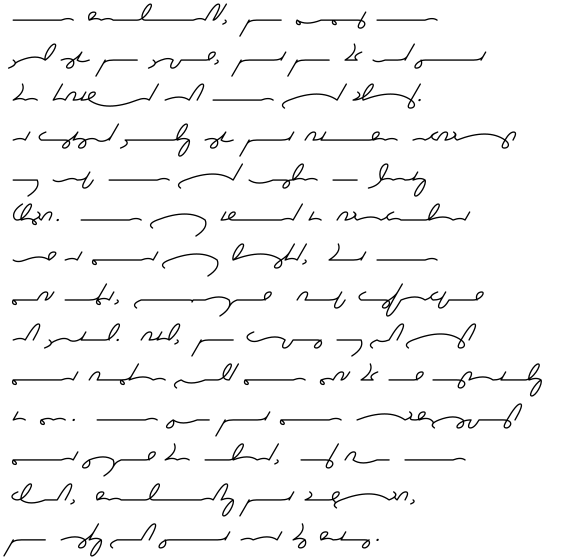

In [2453]:
show_grafoni_kerned_wrapped_ligs_tick("I realized, the moment I fell into the fissure, that the book would not be destroyed as I had planned. It continued falling into that starry expanse of which I had only a fleeting glimpse. I have tried to speculate where it might have landed, but I must admit, however - such conjecture is futile. Still, the question of whose hands might someday hold my mist book are unsettling to me. I know that my apprehensions might never be allayed, and so I close, realizing that perhaps, the ending has not yet been written.",wrap=105)

In [2454]:
words_spelled = {}

with open("1grams_english.csv") as fp:
    fp.readline()
    for line in fp.readlines():
        parts = line.strip().split(",")
        words_spelled[parts[0]] = int(parts[1])

In [2455]:
bigram_count = defaultdict(lambda:0)

count = 0
for word in words_spelled:
    sounds = make_ligatures(process_ends(grafoni_spell(word)))
    weight = words_spelled[word]
    for i in range(len(sounds)-1):
        bigram_count[tuple(sounds[i:i+2])] += weight
    count += 1
    if count > 3000:
        break

In [2456]:
important = sorted(bigram_count.items(), key=lambda k_v: k_v[1], reverse=True)

uv1 uv1   mv2 r   dh mv2   mv3 uv1   uv2 uv1   uv1 n   mv2 n   mv2 v-end   mv2 n_d-end   lv2 mv1   uv1 z   t-beg uv1   mv2 l   r uv1   mv2 t   lv1 uv1   l uv1   uv1 t   uv1 s   uv1 t-end   sh mv2   mv2 m   b-beg uv1   lv3 r   t uv1   uv1 ng   s t   lv1 mv2   mv3 mv1   h-beg uv1   uv1 lv1   uv1 m   uv1 l   uv1 k   s mv2   t mv2   m mv2   s uv1   s t-end   f-beg mv2   s uv2   lv1 mv3   r mv2   t sh   uv1 d-end   n uv1   m uv2   k-beg mv2   n mv3   r uv2   n mv2   uv1 mv2   d-beg uv1   h-beg uv3   uv1 sh   uv1 d   lv1 uv2   uv2 r   d zh   mv3 t   mv3 z   uv2 z   mv3 r   p-beg r   k mv2   m uv1   r mv3   l uv2   v mv2   uv1 th-end   mv1 t   l mv2   h-beg mv2   lv3 l   mv2 s   lv3 n   mv1 d   mv2 n_t-end   uv2 l   uv2 k   uv2 s   uv1 r   uv2 n   k s   sh uv1   uv1 k-end   p mv2   b-beg mv3   m mv3   l mv3   mv2 b   v uv1   t s   d uv1   mv2 d   r s   zh mv2   f uv1   uv1 v   s p   mv2 n_s   dh_uv2 r   b mv2   dh_uv1 s   k t   uv3 t-end   s lv2   r z   f-beg_r mv2   mv1 n   d mv2   r t   t u

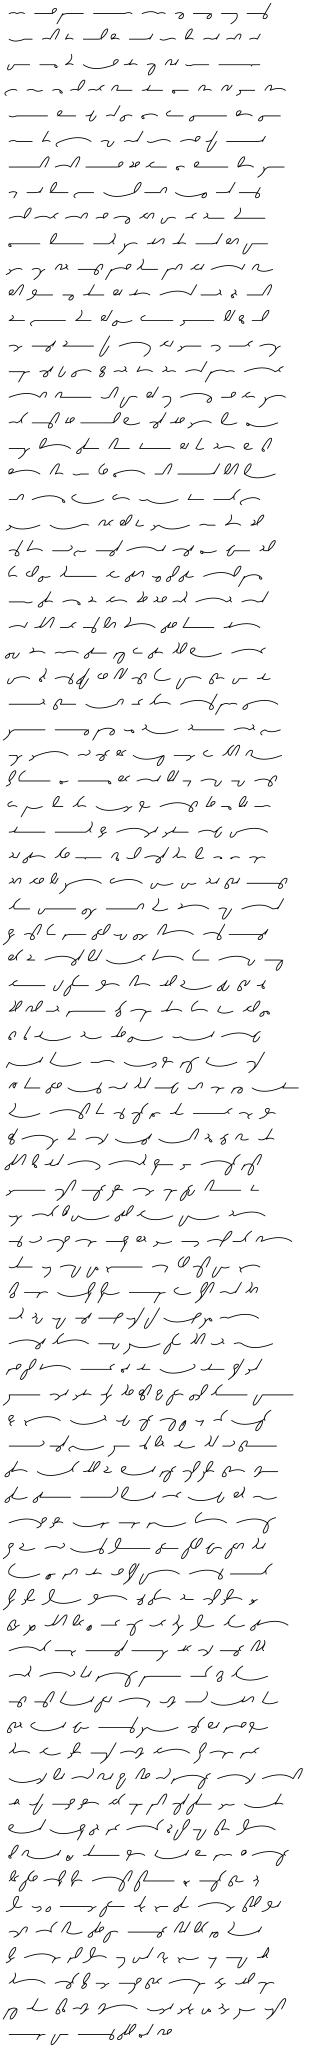

In [2457]:
test = []
for i in range(len(important)):
    test += list(important[i][0]) + [" "]

show_grafoni_kerned_wrapped_ligs_tick(test)

s m lv1 dh-end   m lv2 mv1 m uv2 n_t mv2 m   p-beg r mv2 m lv2 mv1 t   p-beg r lv2 mv1 m mv2 l g uv2 uv1 t-end


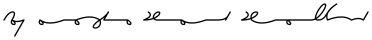

In [2458]:
show_grafoni_kerned_wrapped_ligs_tick("smooth momentum promote promulgate")

In [2460]:
bigram_count[("n","n")]

10505519